In [367]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ParameterGrid
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score
from scipy.stats import f_oneway

In [ ]:
Q1 and Q2

In [368]:
# Website Phishing data
data = pd.read_csv("C:/Users/tejas/Desktop/Assignments/Compsci 762_Foundations of ML/website-phishing.csv")
phishing_data = pd.DataFrame(data)

In [369]:
# Handling null values
phishing_data = phishing_data.replace('?', 0)

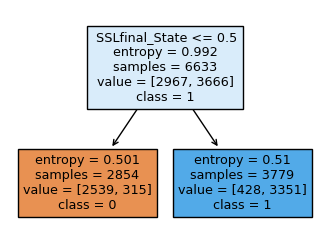

Accuracy score for decision stump is:
Train data score - 0.8879843208201417
Test data score - 0.8903211216644052


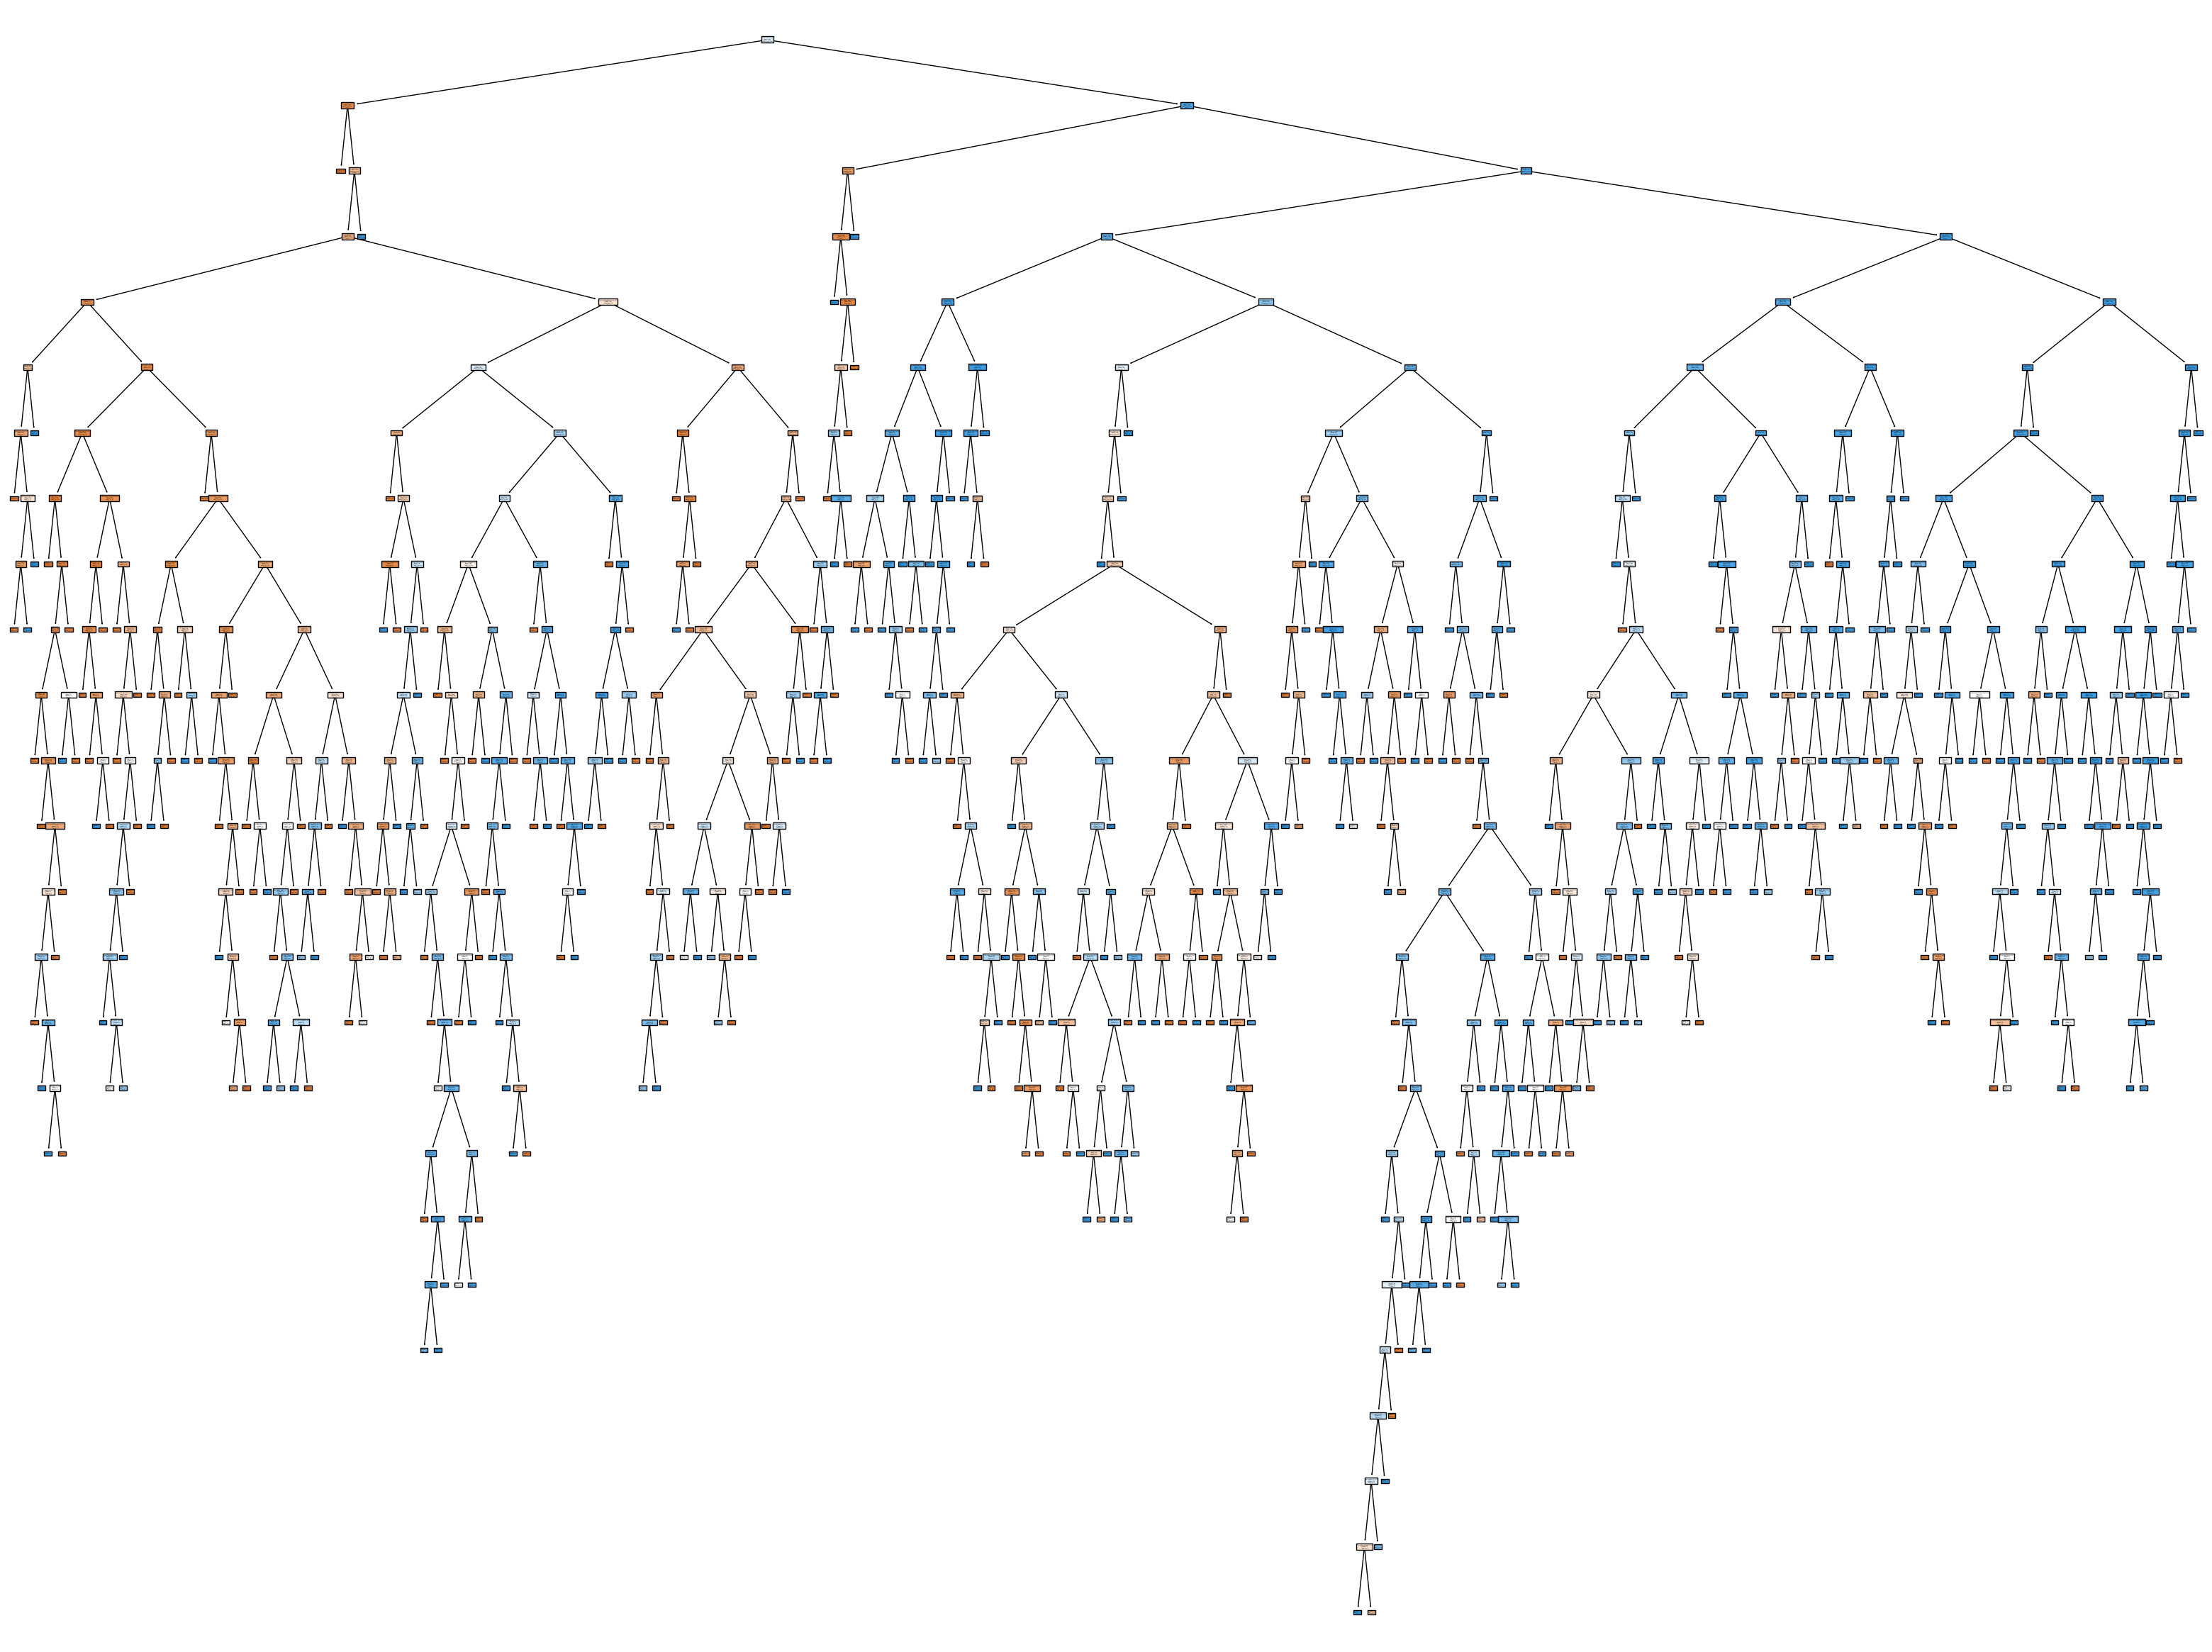

Accuracy score for unpruned decision tree is:
Train data score - 0.9908035579677371
Test data score - 0.9635911352329263


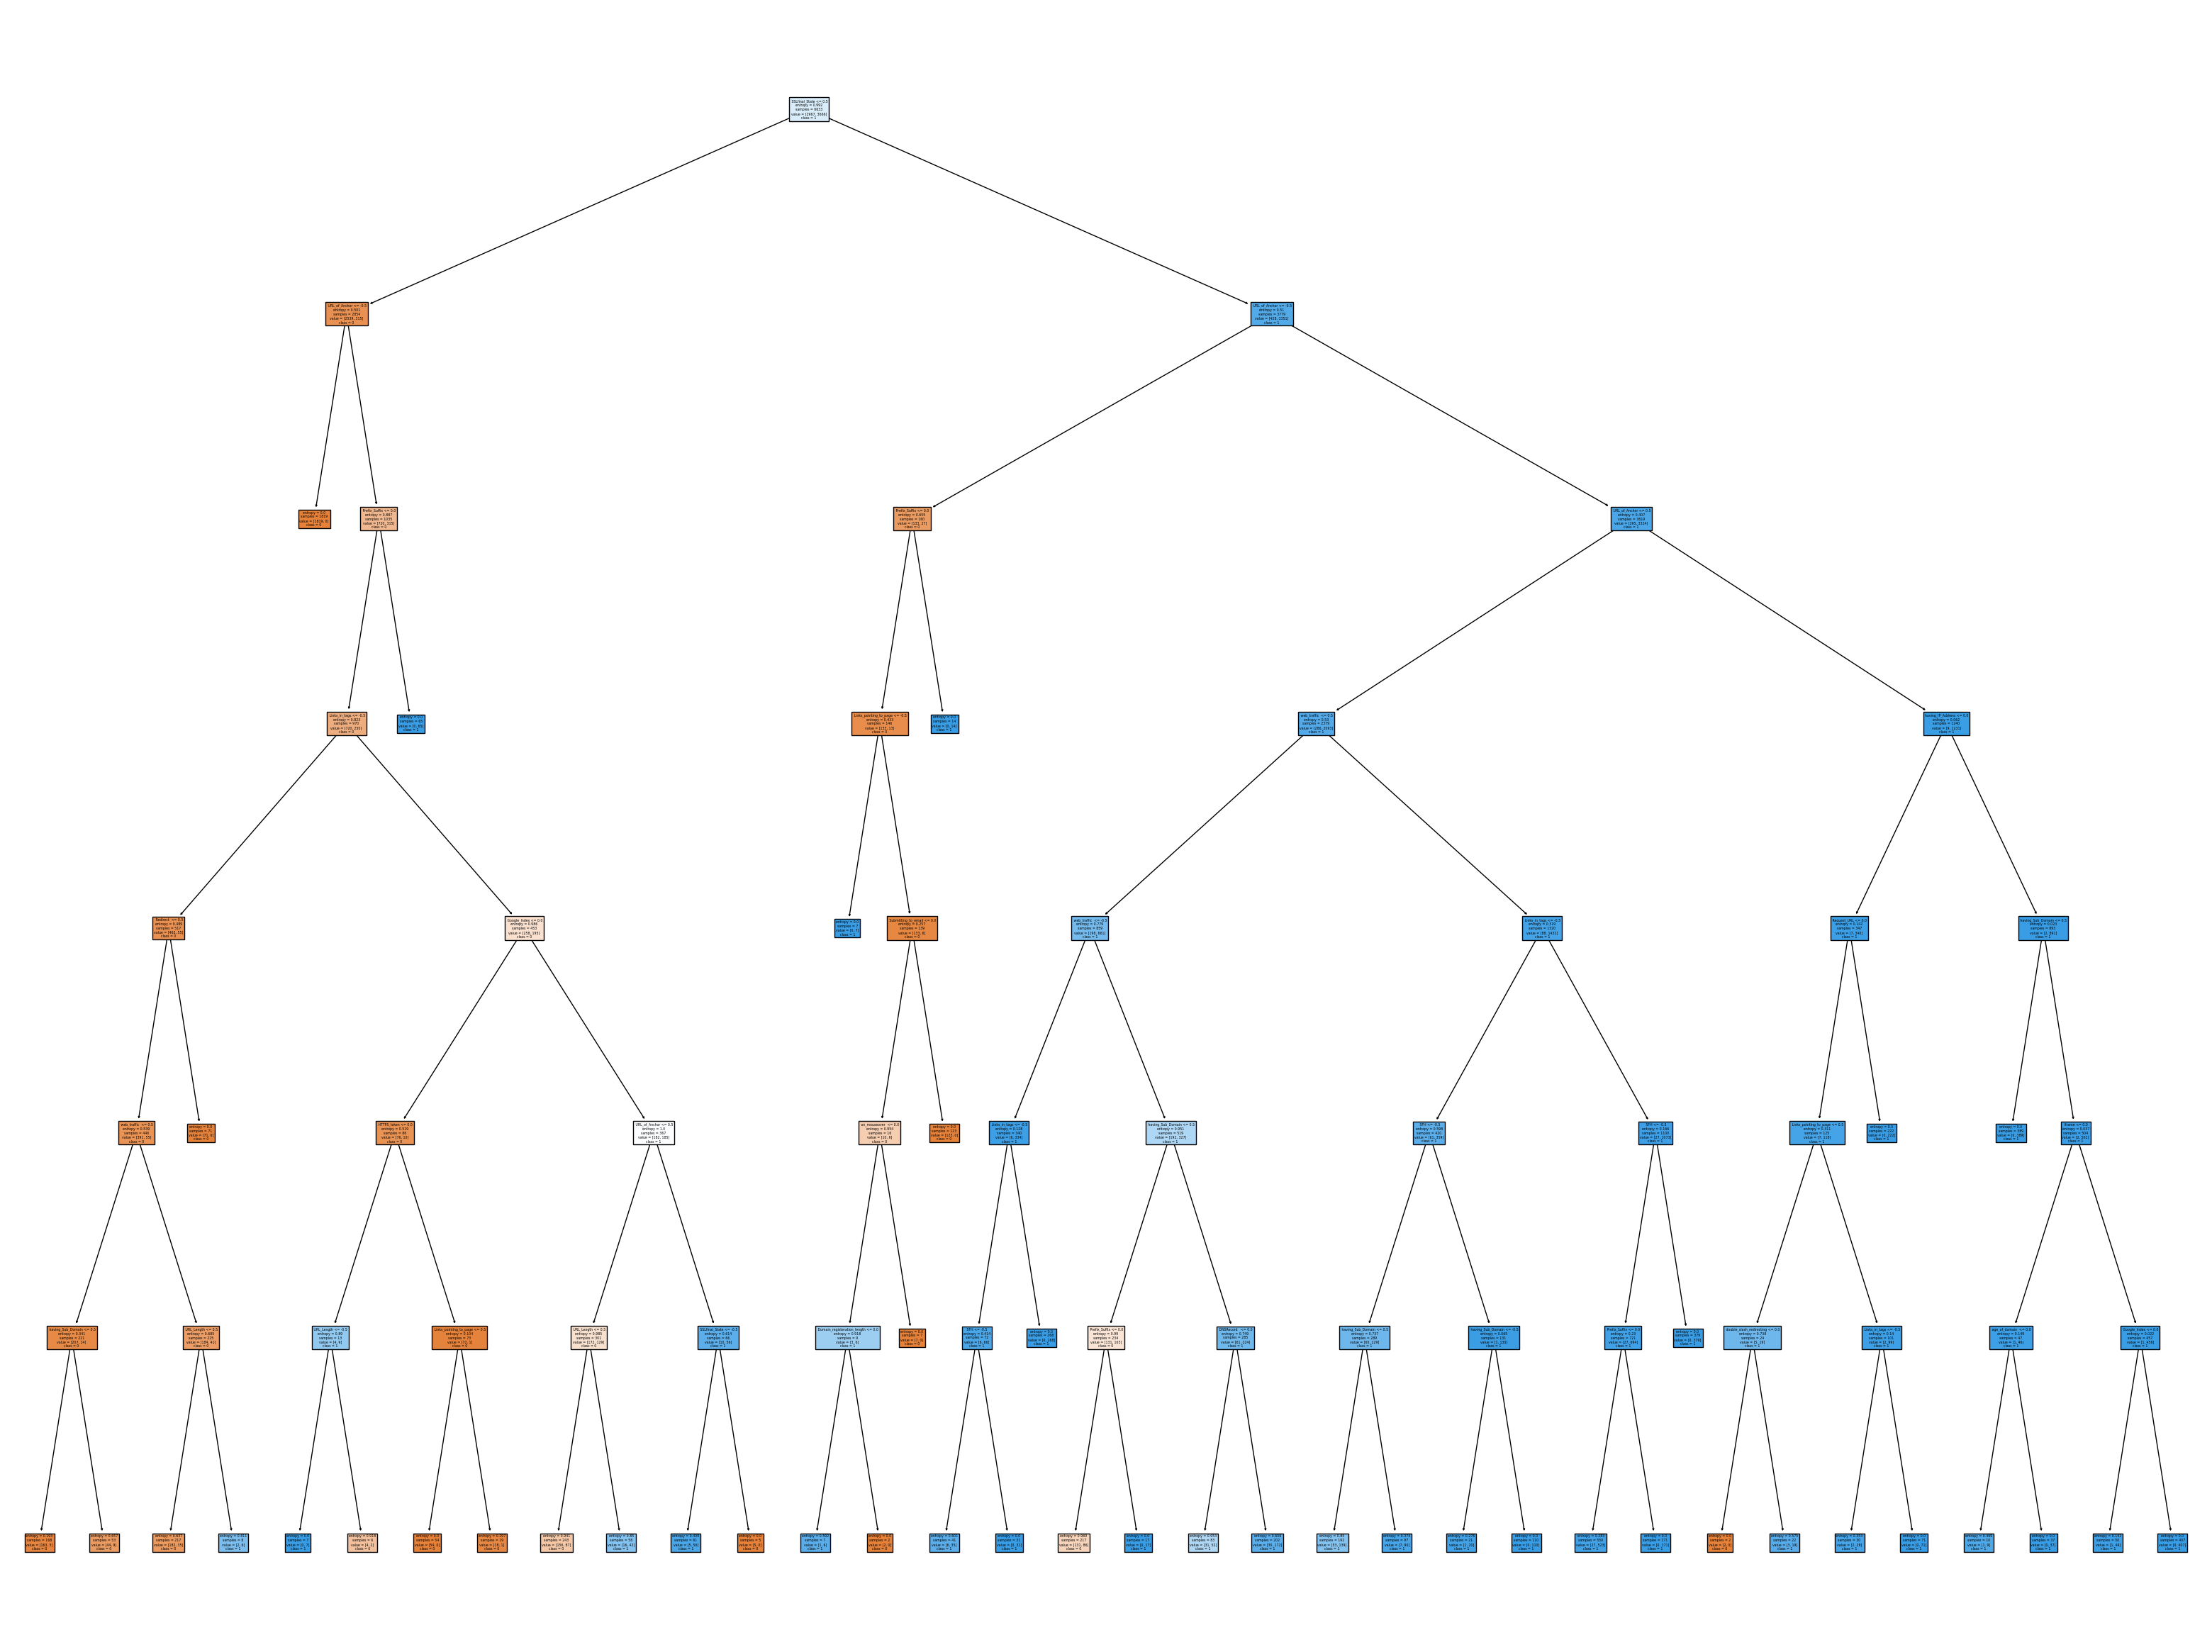

Accuracy score for pruned decision tree is:
Train data score - 0.9380370872908186
Test data score - 0.9378109452736318


In [370]:
# Split data into training and test data

X = phishing_data.loc[:, phishing_data. columns != '  Class ']
y = phishing_data['  Class ']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

features = X.columns

#Implementing a decision stump
decision_stump = DecisionTreeClassifier(criterion = 'entropy',max_depth=1)
decision_stump.fit(x_train, y_train)
plot.figure(figsize=(4, 3))
plot_tree(decision_stump,feature_names=features,class_names=['0', '1'], filled=True)
plot.show()

stump_train_prediction = decision_stump.predict(x_train)
stump_prediction = decision_stump.predict(x_test)
print("Accuracy score for decision stump is:")
print("Train data score -",accuracy_score(y_train,stump_train_prediction))
print("Test data score -",accuracy_score(y_test, stump_prediction))

#Implementing an unpruned decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(decision_tree,feature_names=features,class_names=['0', '1','-1'], filled=True)
plot.show()

train_prediction = decision_tree.predict(x_train)
unpruned_prediction = decision_tree.predict(x_test)
print("Accuracy score for unpruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, unpruned_prediction))

#Implementing a prunned decision tree
pruned_decision_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 7,min_samples_split=3)
pruned_decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(pruned_decision_tree,feature_names=features,class_names=['0', '1','-1'], filled=True)
plot.show()

train_prediction = pruned_decision_tree.predict(x_train)
pruned_prediction = pruned_decision_tree.predict(x_test)
print("Accuracy score for pruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, pruned_prediction))


In [359]:
# arrhythmia data
data = pd.read_csv("C:/Users/tejas/Desktop/Assignments/Compsci 762_Foundations of ML/arrhythmia.csv")
arrhythmia_data = pd.DataFrame(data)

In [360]:
# Handling null values
arrhythmia_data = arrhythmia_data.replace('?', np.NaN)

numeric_cols = arrhythmia_data.select_dtypes(include=['object']).columns  # select columns with object data type
arrhythmia_data[numeric_cols] = arrhythmia_data[numeric_cols].apply(pd.to_numeric, errors='coerce')  # convert object to numeric

for col in arrhythmia_data.columns:
    col_mean = arrhythmia_data[col].mean()  # calculate the mean of the column
    arrhythmia_data[col].fillna(value=col_mean, inplace=True)  # replace NaN values with the mean

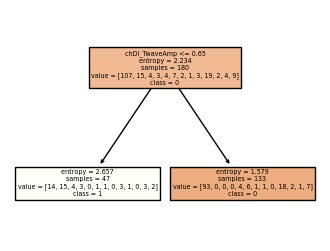

Accuracy score for decision stump is:
Train data score - 0.6
Test data score - 0.4963235294117647


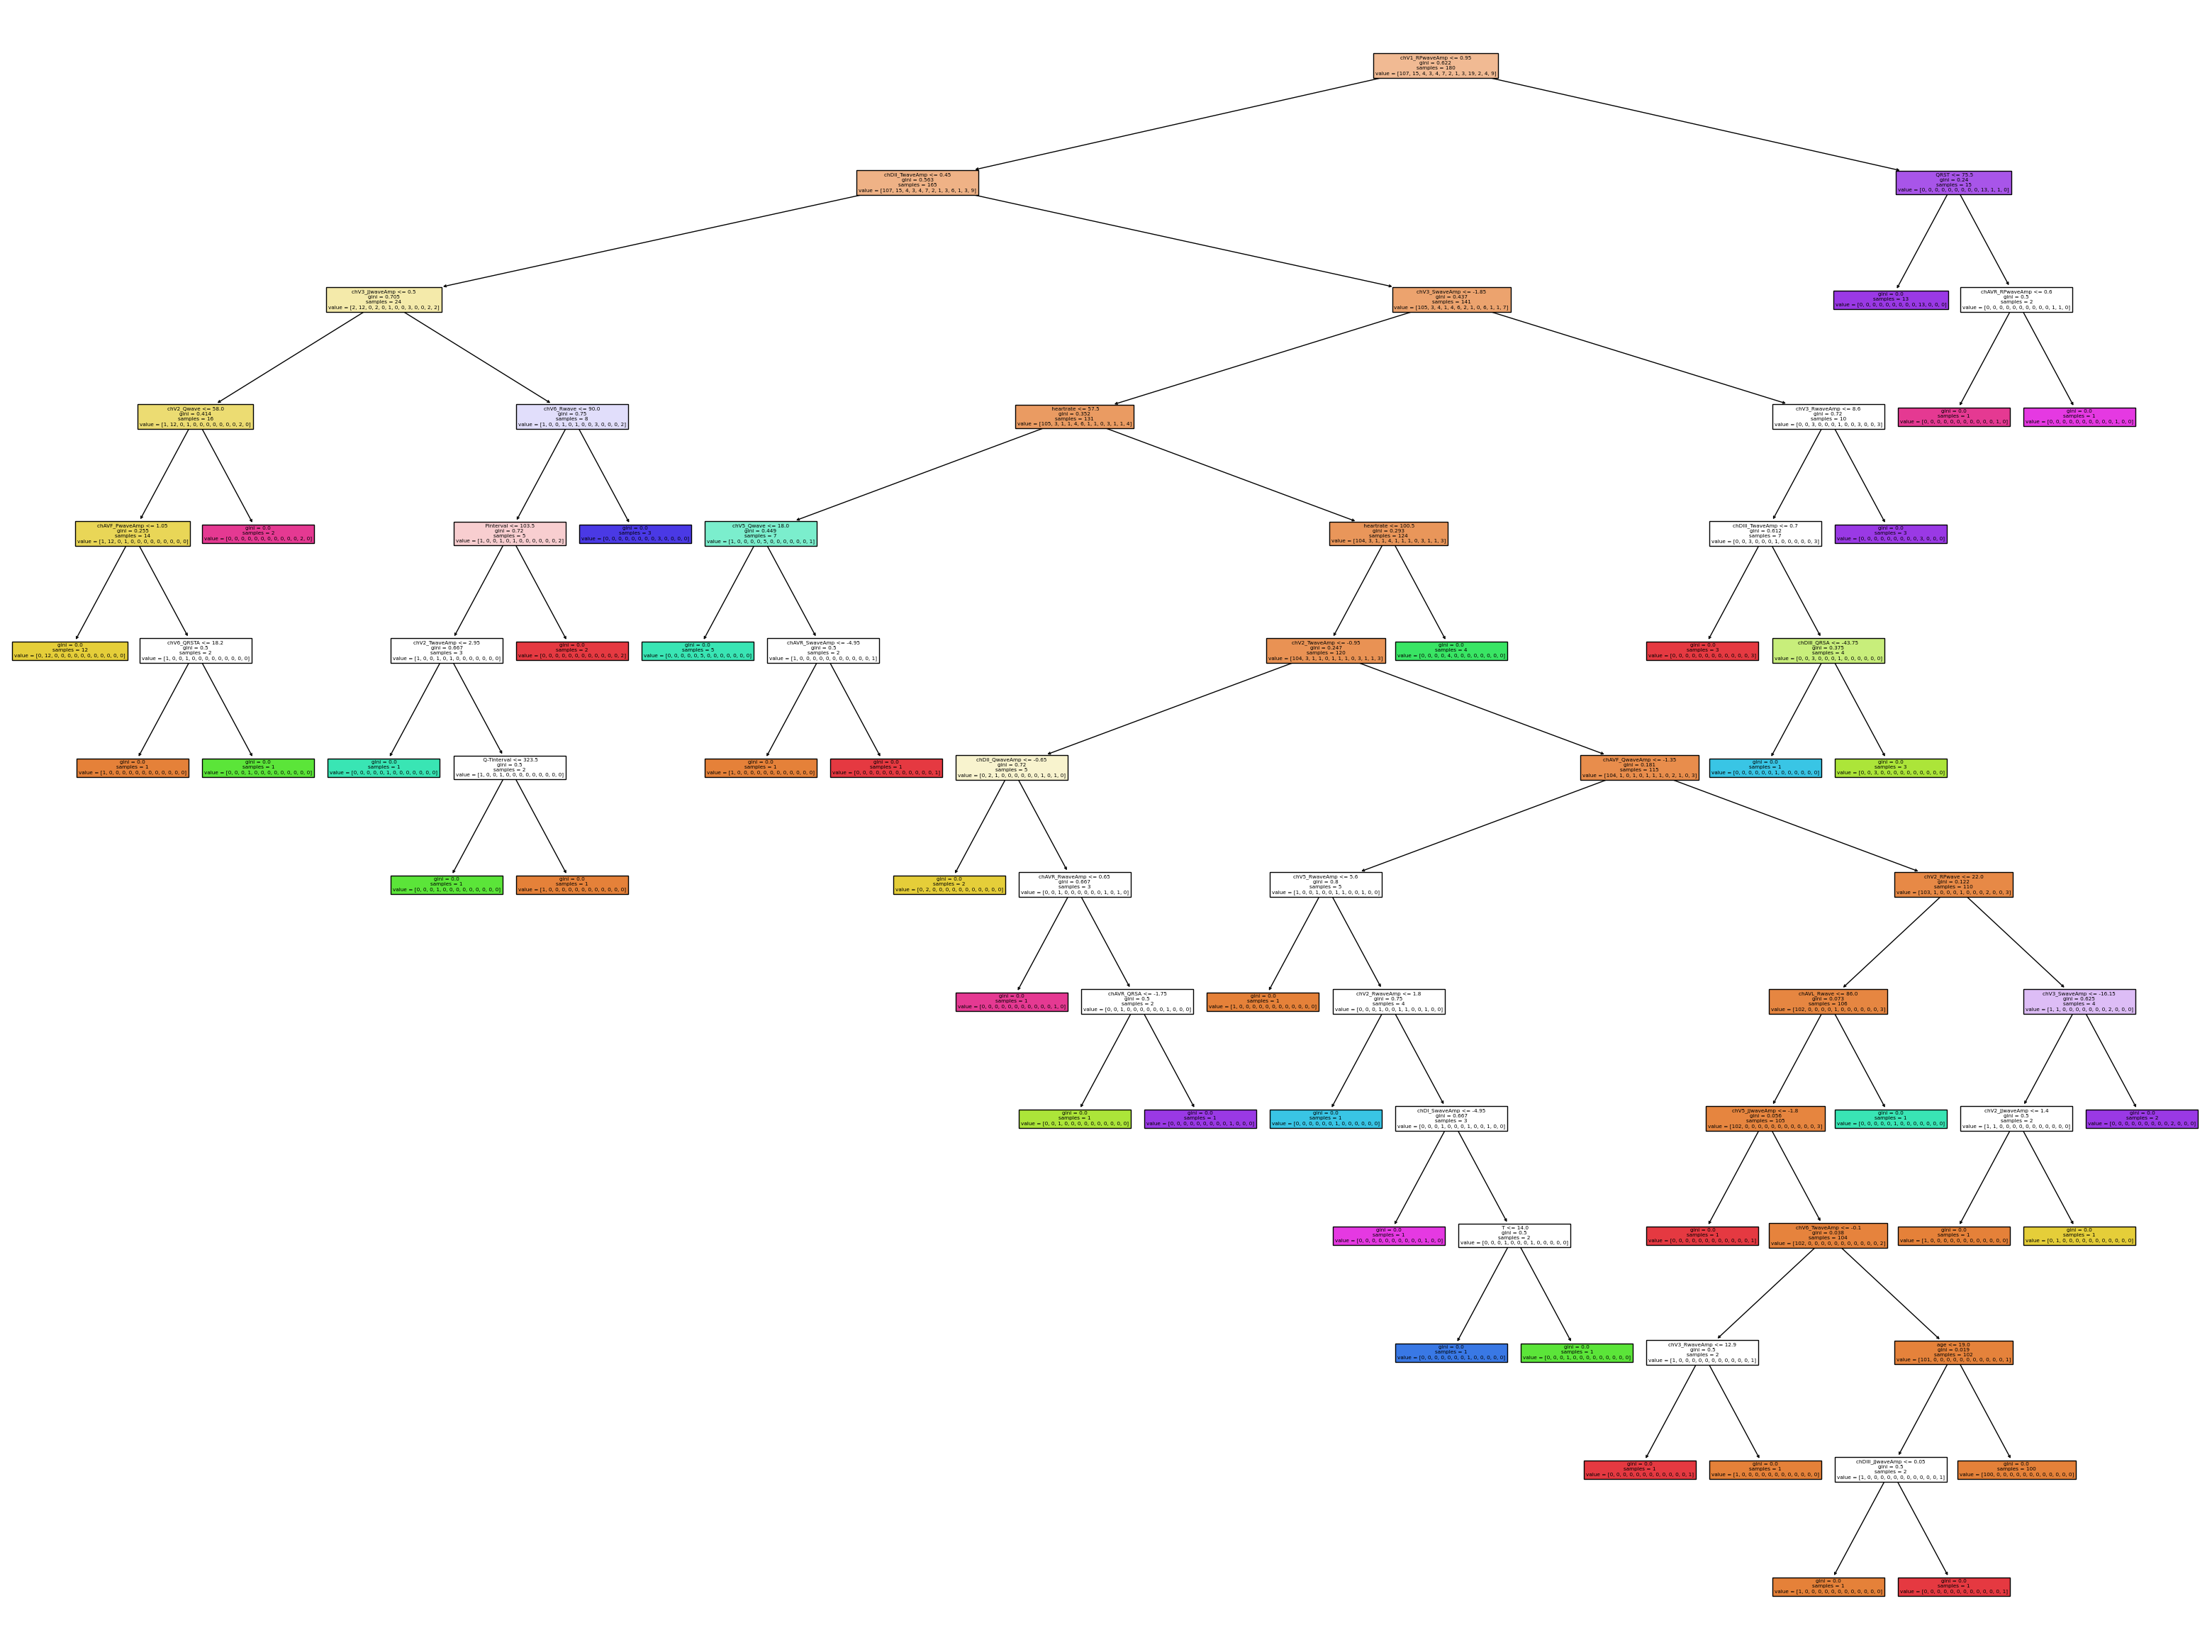

Accuracy score for unpruned decision tree is:
Train data score - 1.0
Test data score - 0.6360294117647058


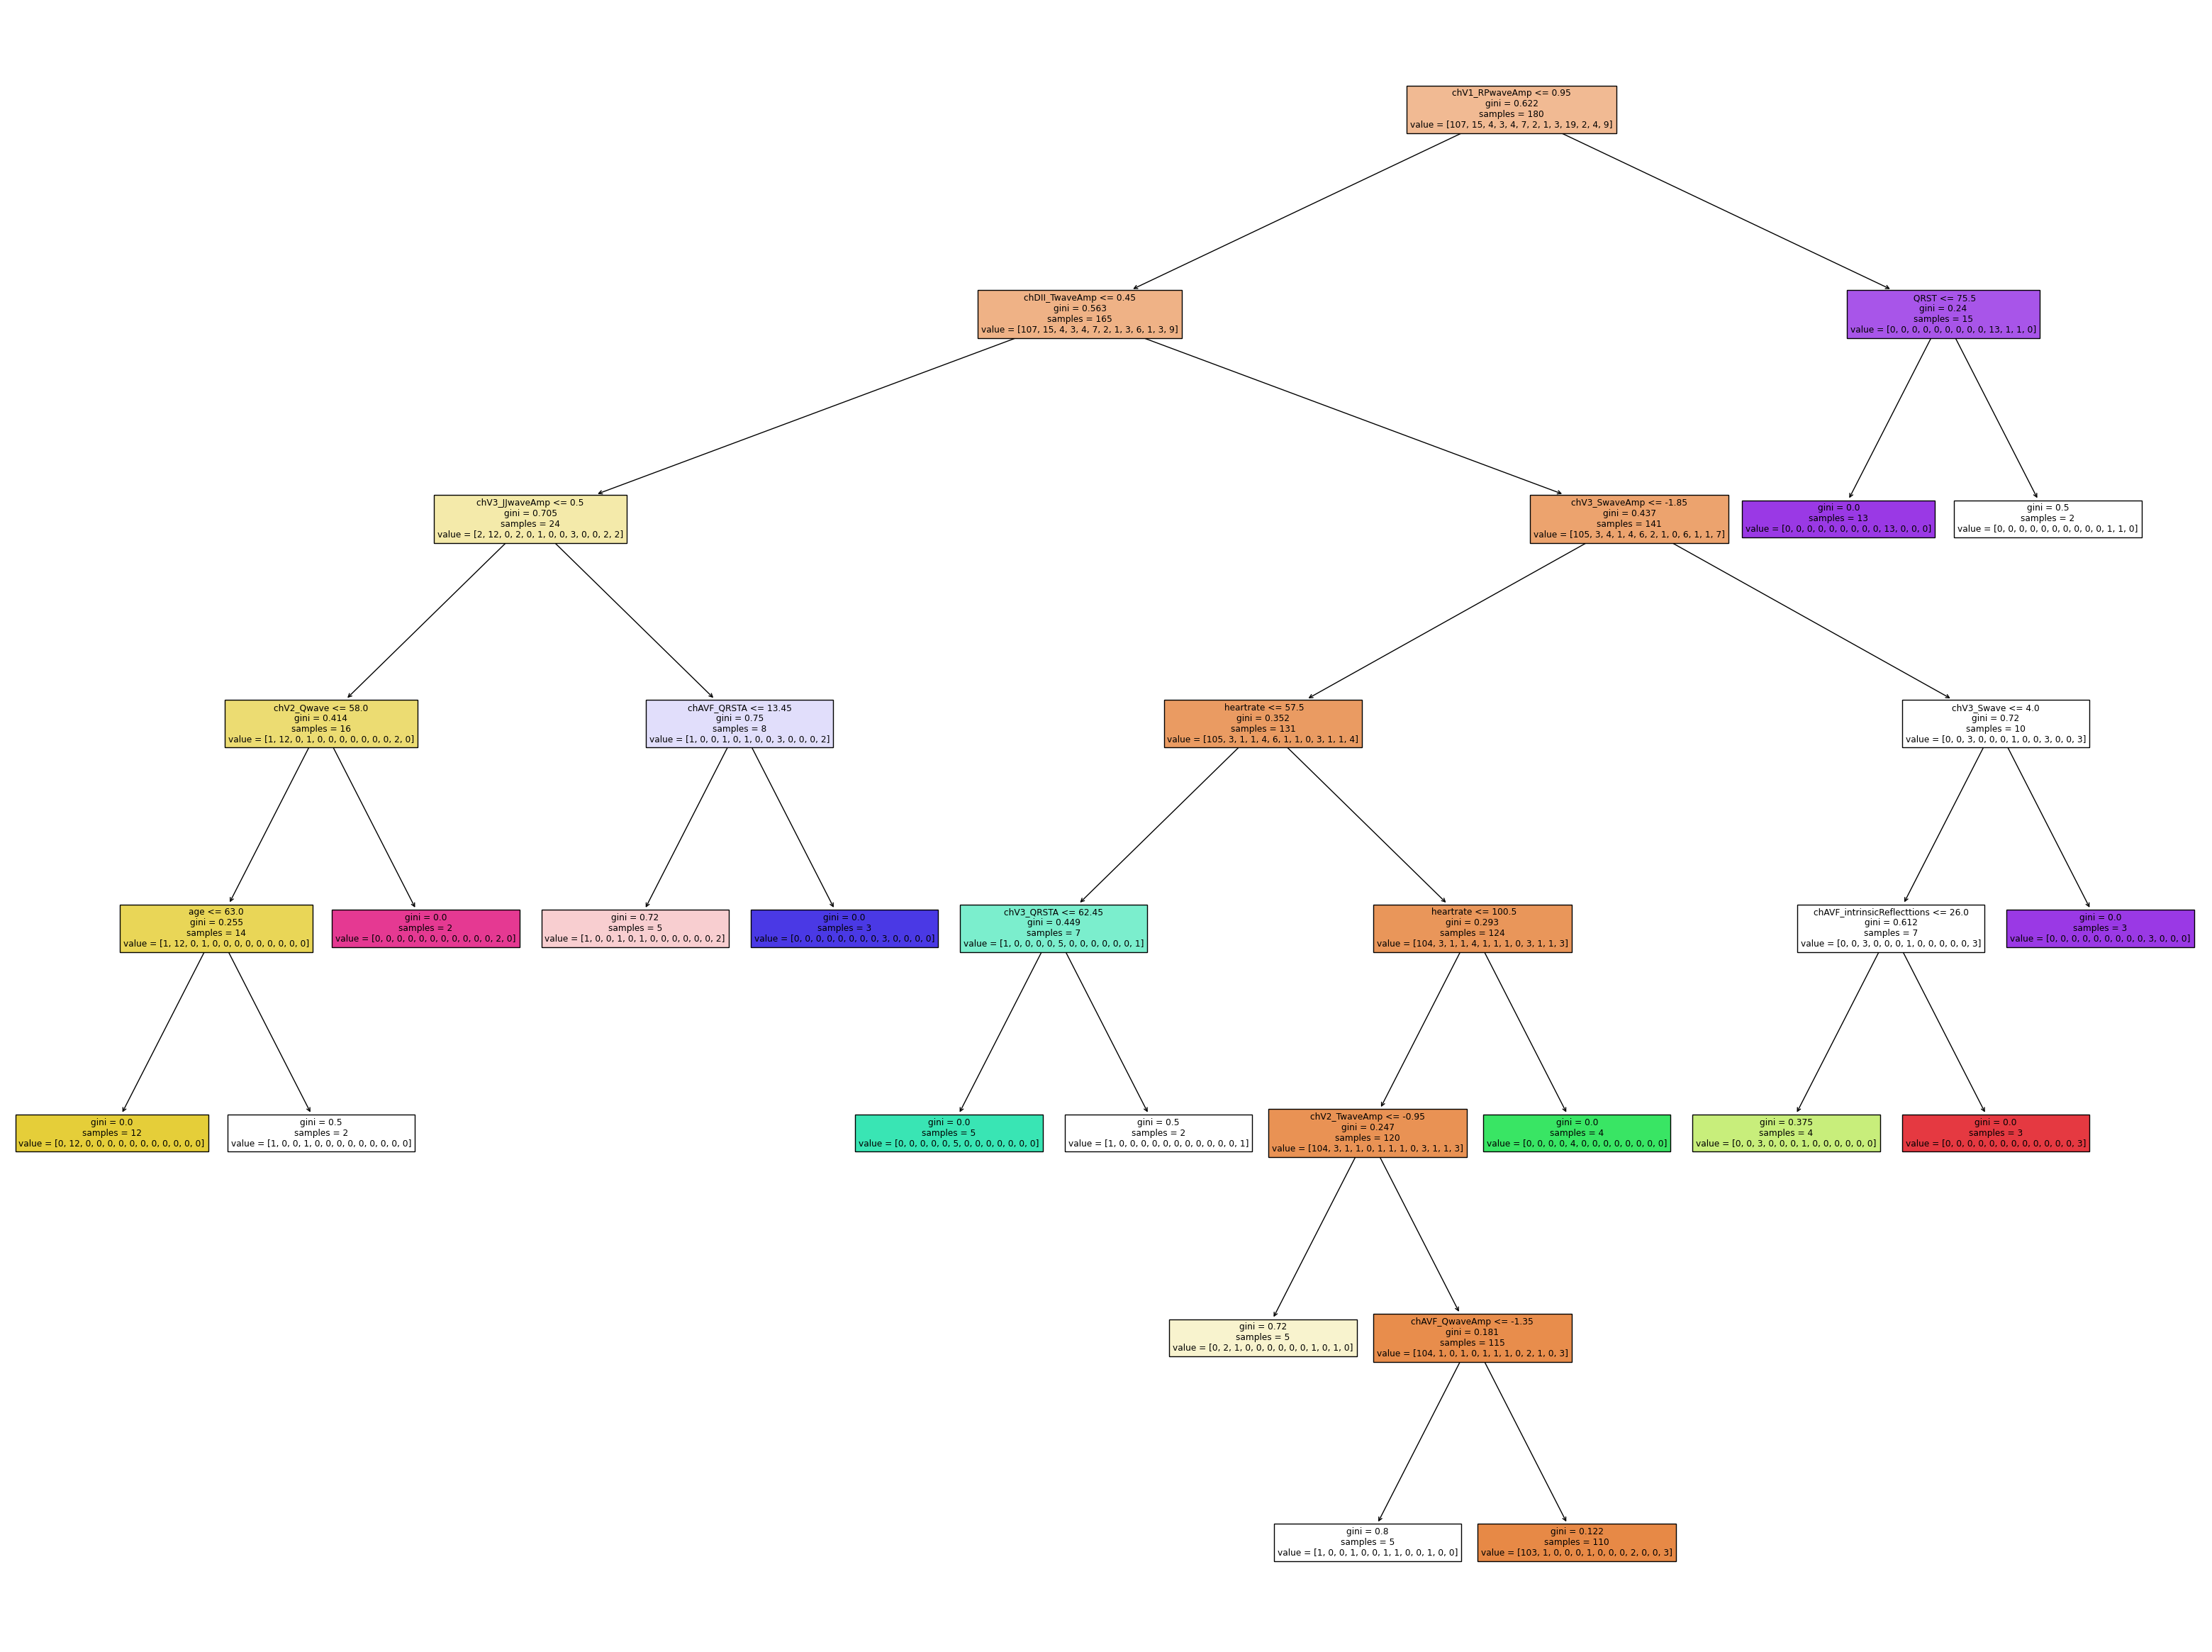

Accuracy score for pruned decision tree is:
Train data score - 0.8833333333333333
Test data score - 0.5992647058823529


In [374]:
#Split data into training and test data

X = arrhythmia_data.loc[:, arrhythmia_data. columns != 'class']
y = arrhythmia_data['class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=4)

features = X.columns

#Implementing a decision stump
decision_stump = DecisionTreeClassifier(criterion = 'entropy',max_depth=1)
decision_stump.fit(x_train, y_train)
plot.figure(figsize=(4, 3))
plot_tree(decision_stump,feature_names=features,class_names=['0', '1'], filled=True)
plot.show()

stump_train_prediction = decision_stump.predict(x_train)
stump_prediction = decision_stump.predict(x_test)
print("Accuracy score for decision stump is:")
print("Train data score -",accuracy_score(y_train,stump_train_prediction))
print("Test data score -",accuracy_score(y_test, stump_prediction))

#Implementing an unpruned decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(decision_tree,feature_names=features, filled=True)
plot.show()

train_prediction = decision_tree.predict(x_train)
unpruned_prediction = decision_tree.predict(x_test)
print("Accuracy score for unpruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, unpruned_prediction))

#Implementing a prunned decision tree
pruned_decision_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 7,min_samples_split=7)
pruned_decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(pruned_decision_tree,feature_names=features, filled=True)
plot.show()

train_prediction = pruned_decision_tree.predict(x_train)
pruned_prediction = pruned_decision_tree.predict(x_test)
print("Accuracy score for pruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, pruned_prediction))


In [365]:
# BCP data
data = pd.read_csv("C:/Users/tejas/Desktop/Assignments/Compsci 762_Foundations of ML/BCP.csv")
bcp_data = pd.DataFrame(data)

In [386]:
# Handling null values
bcp_data = bcp_data.replace('?', np.NaN)

numeric_cols = bcp_data.select_dtypes(include=['object']).columns  # select columns with object data type
bcp_data[numeric_cols] = arrhythmia_data[numeric_cols].apply(pd.to_numeric, errors='coerce')  # convert object to numeric

for col in bcp_data.columns:
    col_mean = bcp_data[col].mean()  # calculate the mean of the column
    bcp_data[col].fillna(value=col_mean, inplace=True)  # replace NaN values with the mean

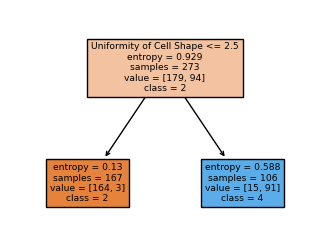

Accuracy score for decision stump is:
Train data score - 0.9340659340659341
Test data score - 0.9024390243902439


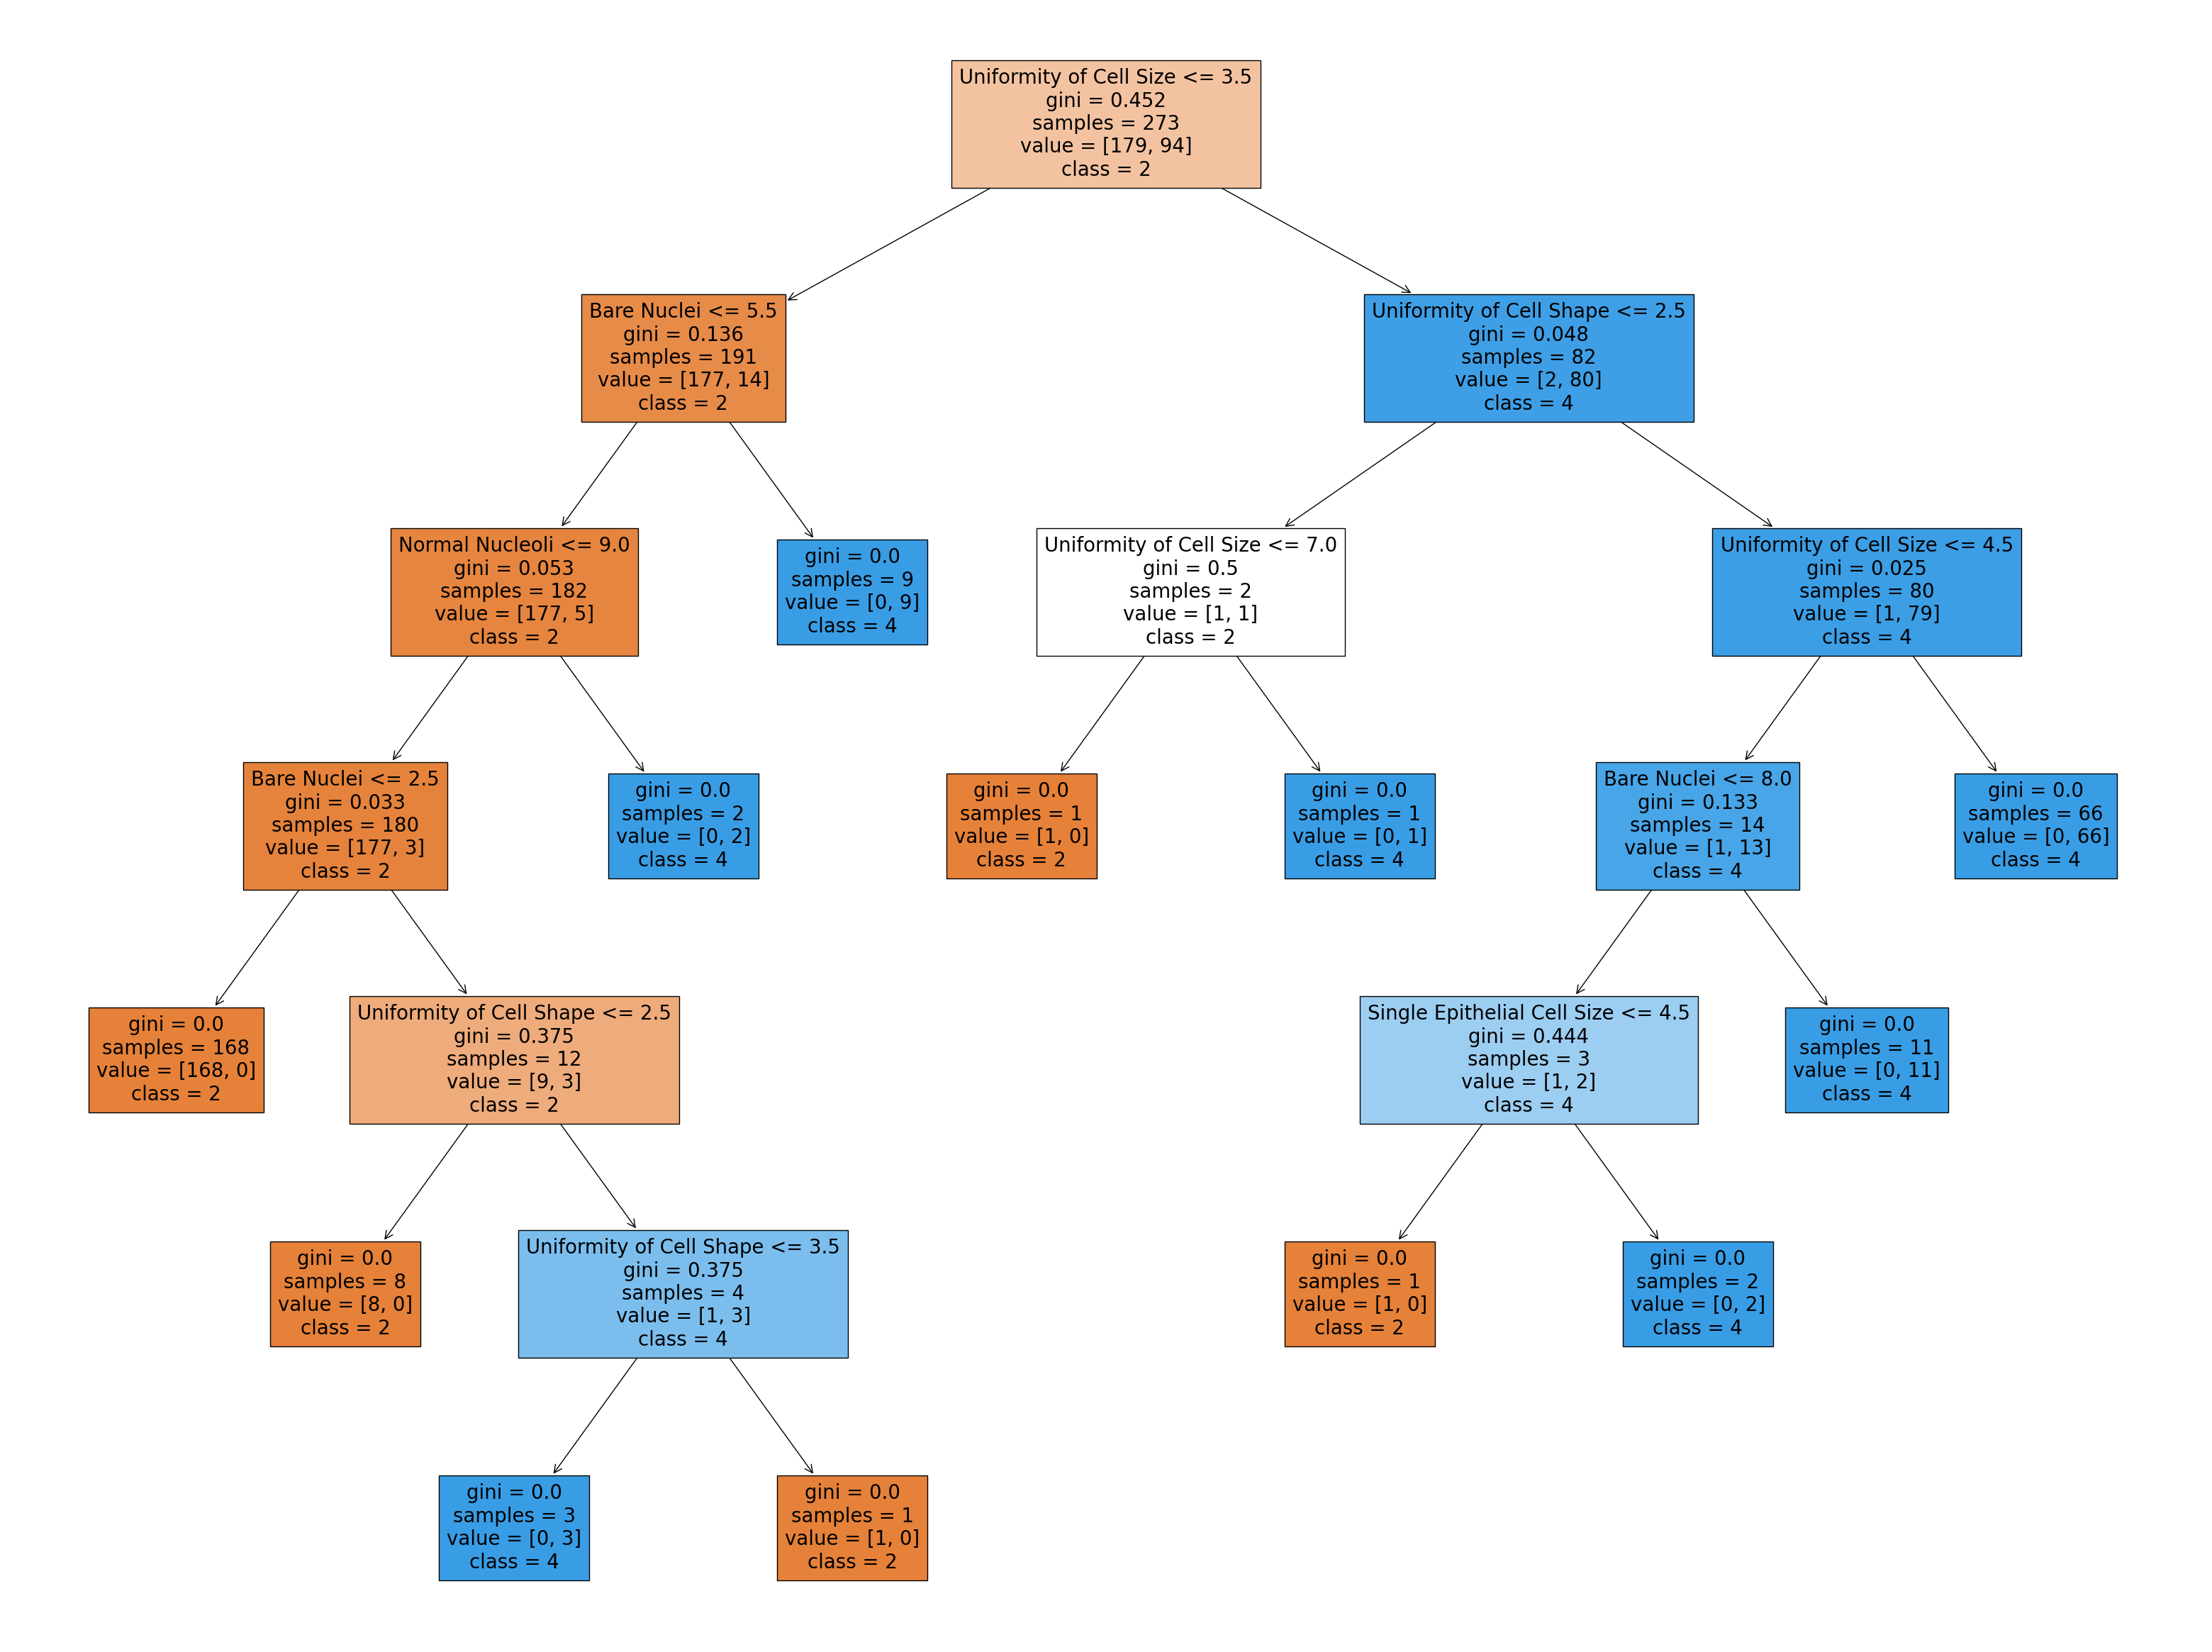

Accuracy score for unpruned decision tree is:
Train data score - 1.0
Test data score - 0.9414634146341463


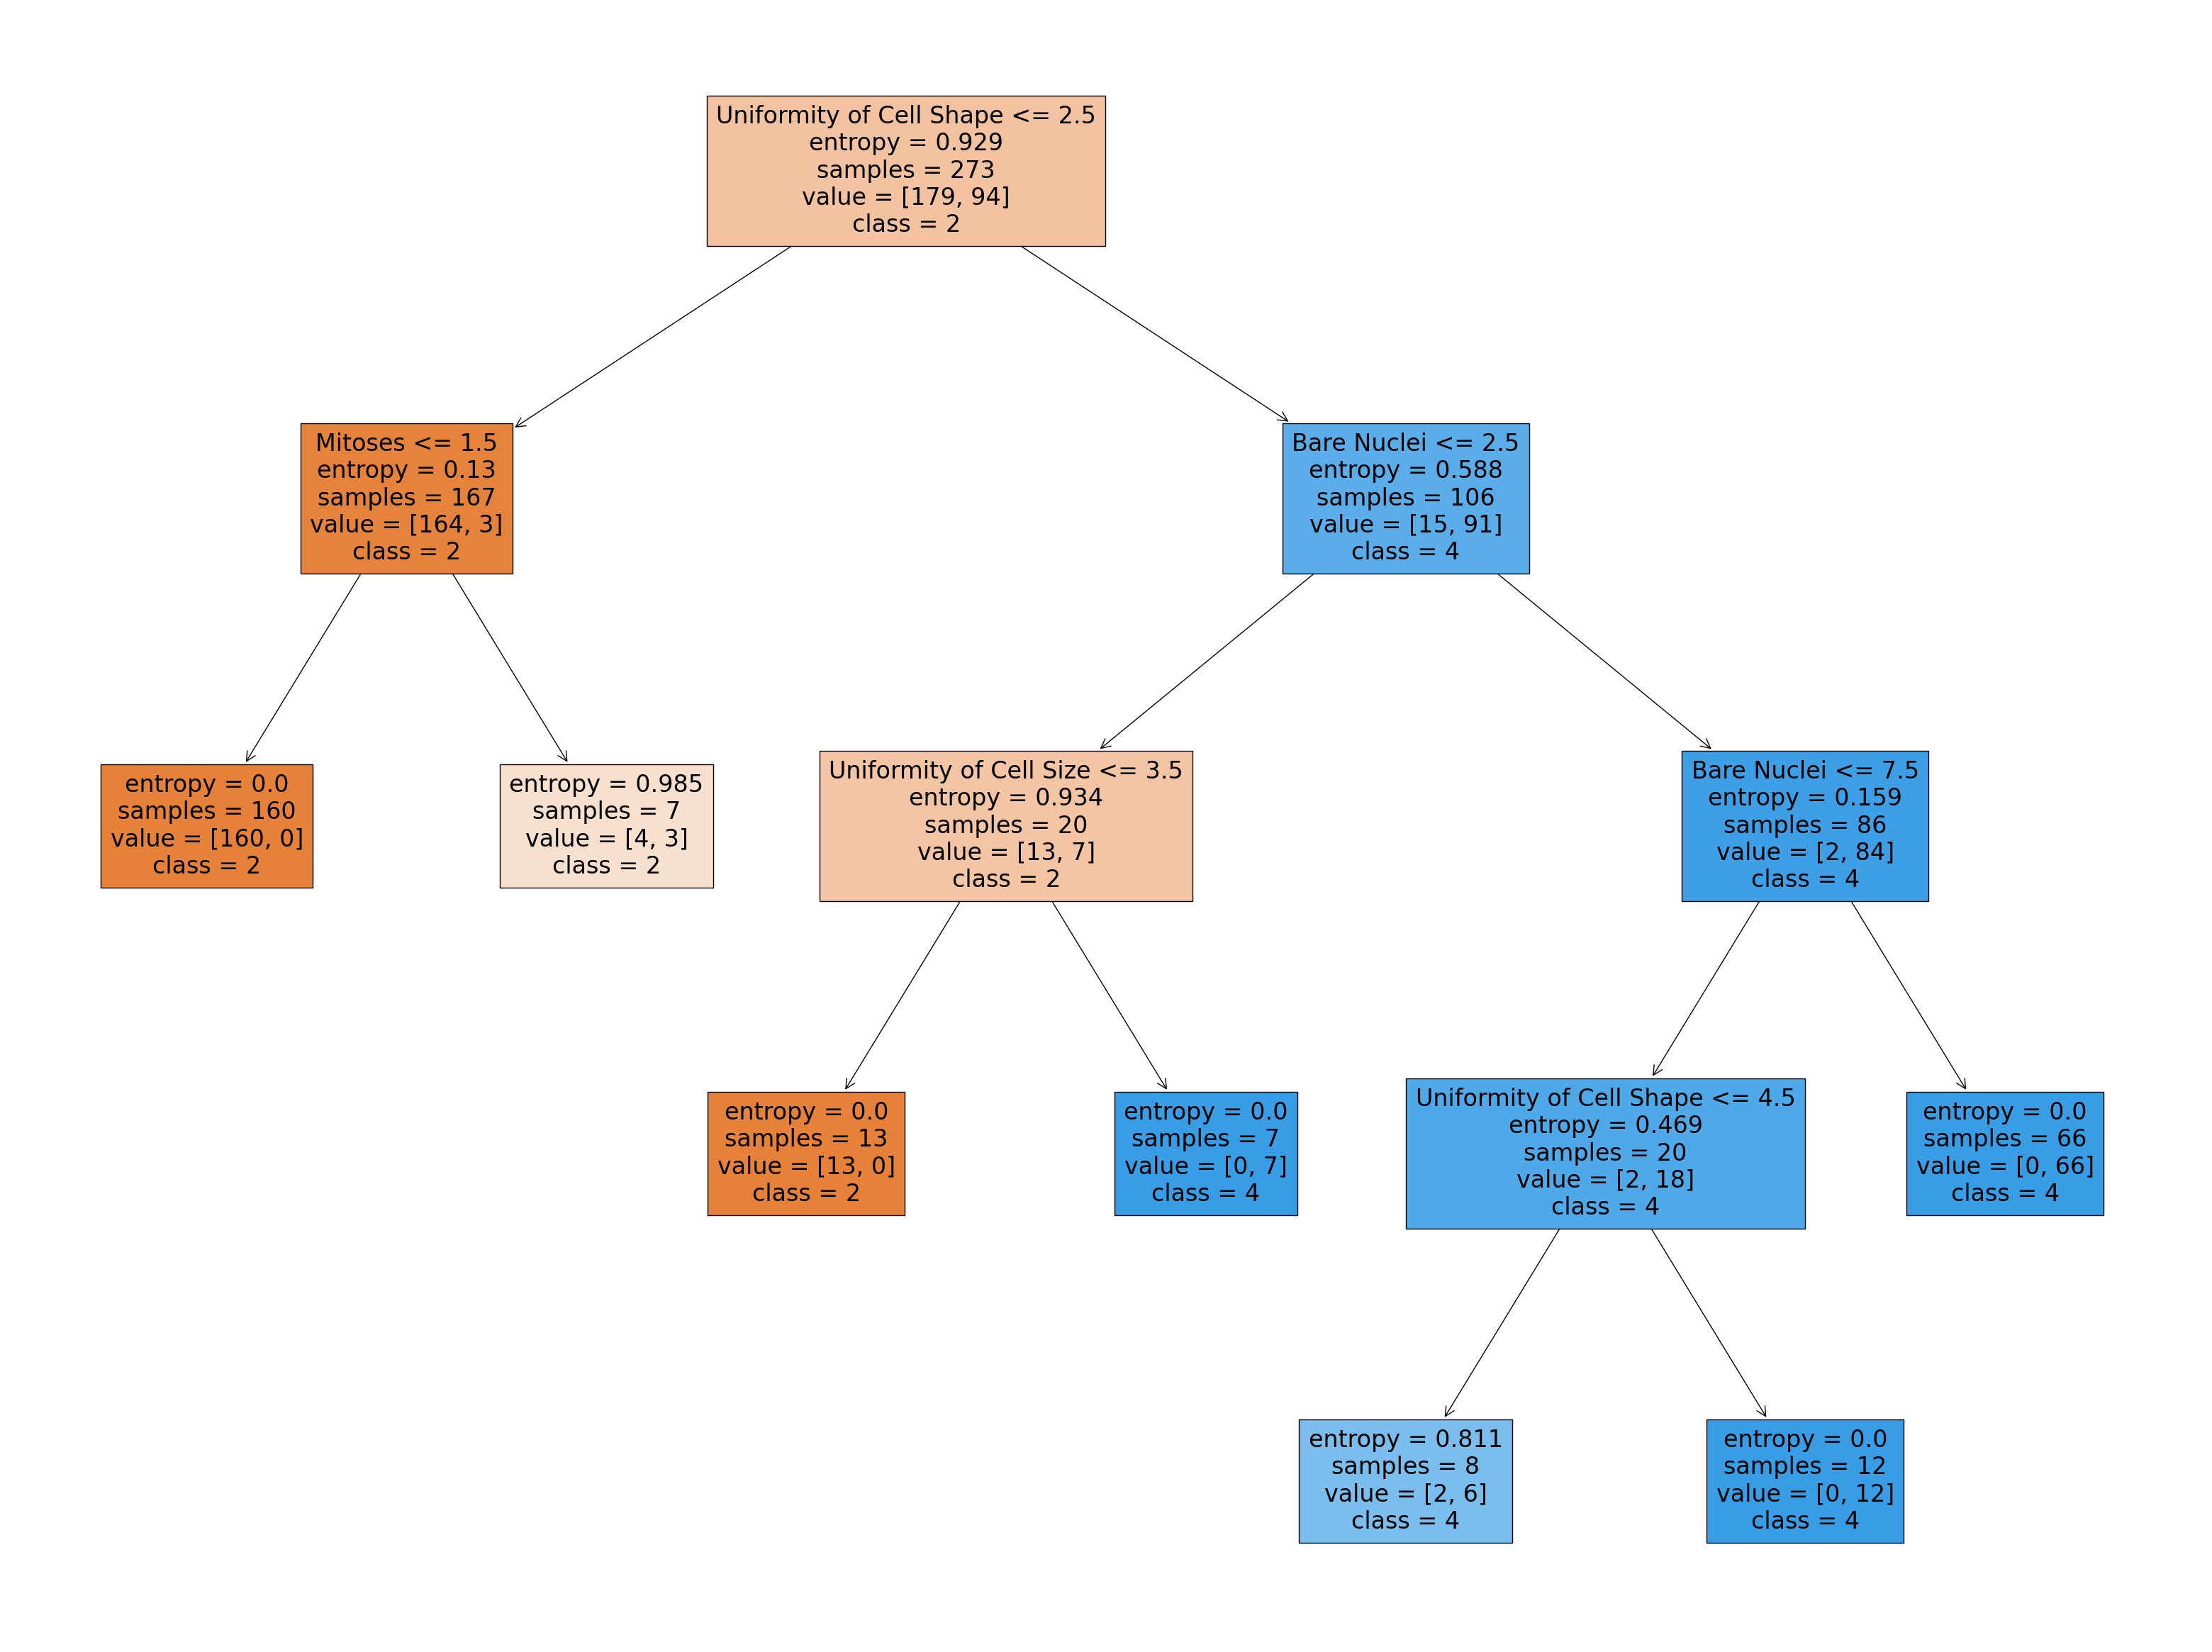

Accuracy score for pruned decision tree is:
Train data score - 0.9816849816849816
Test data score - 0.9414634146341463


In [387]:
# Split data into training and test data

X = bcp_data.loc[:, bcp_data. columns != 'Class']
y = bcp_data['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=4)

features = X.columns

#Implementing a decision stump
decision_stump = DecisionTreeClassifier(criterion = 'entropy',max_depth=1)
decision_stump.fit(x_train, y_train)
plot.figure(figsize=(4, 3))
plot_tree(decision_stump,feature_names=features,class_names=['2', '4'], filled=True)
plot.show()

stump_train_prediction = decision_stump.predict(x_train)
stump_prediction = decision_stump.predict(x_test)
print("Accuracy score for decision stump is:")
print("Train data score -",accuracy_score(y_train,stump_train_prediction))
print("Test data score -",accuracy_score(y_test, stump_prediction))

#Implementing an unpruned decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(decision_tree,feature_names=features,class_names=['2', '4'], filled=True)
plot.show()

train_prediction = decision_tree.predict(x_train)
unpruned_prediction = decision_tree.predict(x_test)
print("Accuracy score for unpruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, unpruned_prediction))

#Implementing a prunned decision tree
pruned_decision_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 11,min_samples_split=10)
pruned_decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(pruned_decision_tree,feature_names=features,class_names=['2', '4'], filled=True)
plot.show()

train_prediction = pruned_decision_tree.predict(x_train)
pruned_prediction = pruned_decision_tree.predict(x_test)
print("Accuracy score for pruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, unpruned_prediction))


In [390]:
Q2 Explaining the pruning methods

Pruning methods are used to reduce the depth of a decision tree by replacing a stump with a node that generally
classifies the examples. Pruning is mainly used in cases where the decision tree is overfitting.

Initially, we have used pre-pruning techniques on the decision tree. With pre-pruning we prevent building of deep decision 
trees by stopping the algorithm before the tree is fully built. Here we have used hyper parameters of DecisionTreeClassifier 
to prune the trees. The hyper parameters are - 

max_depth - This hyper parameter controlls the depth of the decision tree. So we limit the number of levels of a decision tree 
upto a certain number.

min_samples_split - The hyperparameter helps in adjusting the minimum number of examples that are to be considered for a 
particular node split.

In [ ]:
Q3

In [371]:
# Choosing and tuning hyper parameters for phishing data

X = phishing_data.loc[:, phishing_data. columns != '  Class ']
y = phishing_data['  Class ']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the outer fold splits
kf_outer = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid to search
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [8, 10, 12, 14], 'min_samples_split': [9, 11, 13, 15]}

# Initialize variables to store the best hyper parameters
best_params = None
best_score = float('-inf')
avg_score = 0

# Loop through the outer folds
for train_val_index, test_index in kf_outer.split(X_train):
    
    # Split the data into training/validation and test sets
    X_train_val, X_val = X_train.iloc[train_val_index], X_train.iloc[test_index]
    y_train_val, y_val = y_train.iloc[train_val_index], y_train.iloc[test_index]

    # Define the inner fold splits
    kf_inner = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize a grid search to find the best hyper parameters
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=kf_inner, scoring='accuracy')

    # Fit the grid search on the training/validation set
    grid_search.fit(X_train_val, y_train_val)

    # Compute the average score over the inner folds
    avg_score += grid_search.best_score_ / kf_outer.n_splits

    # Check if the current hyper parameters are better than the previous best
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        
# Train the decision tree model on the full training set with the best hyperparameters
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = dt.score(X_test, y_test)

# Print the results
print(f'Average score: {avg_score:.4f}')
print(f'Best score: {best_score:.4f}')
print(f'Best parameters: {best_params}')
print(f'Test score: {test_score:.4f}')


Average score: 0.9452
Best score: 0.9461
Best parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 9}
Test score: 0.9462


In [375]:
# Choosing and tuning hyper parameters for arrhythmia dataset

X = arrhythmia_data.loc[:, arrhythmia_data. columns != 'class']
y = arrhythmia_data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the outer fold splits
kf_outer = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid to search
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [8, 9, 10, 11], 'min_samples_split': [15, 17, 19, 21]}

# Initialize variables to store the best hyperparameters
best_params = None
best_score = float('-inf')
avg_score = 0

# Loop through the outer folds
for train_val_index, test_index in kf_outer.split(X_train):
    # Split the data into training/validation and test sets
    X_train_val, X_val = X_train.iloc[train_val_index], X_train.iloc[test_index]
    y_train_val, y_val = y_train.iloc[train_val_index], y_train.iloc[test_index]

    # Define the inner fold splits
    kf_inner = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize a grid search to find the best hyper parameters
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=kf_inner, scoring='accuracy')

    # Fit the grid search on the training/validation set
    grid_search.fit(X_train_val, y_train_val)

    # Compute the average score over the inner folds
    avg_score += grid_search.best_score_ / kf_outer.n_splits

    # Check if the current hyper parameters are better than the previous best
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        
# Train the decision tree model on the full training set with the best hyper parameters
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = dt.score(X_test, y_test)

# Print the results
print(f'Average score: {avg_score:.4f}')
print(f'Best score: {best_score:.4f}')
print(f'Best parameters: {best_params}')
print(f'Test score: {test_score:.4f}')

Average score: 0.6411
Best score: 0.6864
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 15}
Test score: 0.6243


In [379]:
# Choosing and tuning hyper parameters for BCP dataset

X = bcp_data.loc[:, bcp_data. columns != 'Class']
y = bcp_data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the outer fold splits
kf_outer = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid to search
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [8, 9, 10, 11], 'min_samples_split': [7, 13, 15, 17]}

# Initialize variables to store the best hyper parameters
best_params = None
best_score = float('-inf')
avg_score = 0

# Loop through the outer folds
for train_val_index, test_index in kf_outer.split(X_train):
    # Split the data into training/validation and test sets
    X_train_val, X_val = X_train.iloc[train_val_index], X_train.iloc[test_index]
    y_train_val, y_val = y_train.iloc[train_val_index], y_train.iloc[test_index]

    # Define the inner fold splits
    kf_inner = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize a grid search to find the best hyper parameters
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=kf_inner, scoring='accuracy')

    # Fit the grid search on the training/validation set
    grid_search.fit(X_train_val, y_train_val)

    # Compute the average score over the inner folds
    avg_score += grid_search.best_score_ / kf_outer.n_splits

    # Check if the current hyper parameters are better than the previous best
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        
# Train the decision tree model on the full training set with the best hyper parameters
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = dt.score(X_test, y_test)

# Print the results
print(f'Average score: {avg_score:.4f}')
print(f'Best score: {best_score:.4f}')
print(f'Best parameters: {best_params}')
print(f'Test score: {test_score:.4f}')

Average score: 0.9511
Best score: 0.9603
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 15}
Test score: 0.9270


In [391]:
Q3 Hyper parameters explanation and observations for 3 datasets. 

For tuning and choosing proper hyper parameters, we have used nested cross validation. It is a method used for increasing the 
performance of the decision tree by using appropriate values for the hyper parameters.

In the outer loop the dataset is divided into training and test sets, while in the inner loop we divide the training set again
into training and validation sets.

We train the model on training data and evaluate it on the validation data. This evaluation is done for all hyper parameters 
and we take an average of the performance for each combination.

At the end we figure out the best hyper parameters with their optimum values and use them on test set for
evaluating its performance.

Comparing the unpruned,pruned and hyperparameters' tuned decision trees for phishing data, we can see that the accuracy score 
for the unpruned tree is the highest, considering it is overfitting the given dataset. The accuracy is lowest when we 
arbitrarily select the hyperparameters and use random values for them. The accuracy score can be considered average when these 
hyper parameters are tunned.

Similar to previous dataset, here the accuracy score on the unpruned tree is the highest for arrhythmia dataset. Comparing 
scores for pruned and tunned tree, the tunned tree has better performance.

In the case of Breast Cancer Patients data, the tunned tree score is maximum, compared to the other two datasets.

In [ ]:
Q4

In [372]:
# Report the p-value for the significance tests - phishing data

f_statistic, p_value = f_oneway(stump_prediction, unpruned_prediction, pruned_prediction)
print("F statistic: ", f_statistic)
print("P value: ", p_value)

F statistic:  3.6415734452507507
P value:  0.02623728055618713


In [376]:
# Report the p-value for the significance tests - arrhythmia data

f_statistic, p_value = f_oneway(stump_prediction, unpruned_prediction, pruned_prediction)
print("F statistic: ", f_statistic)
print("P value: ", p_value)

F statistic:  43.191504853914026
P value:  1.4903722601639892e-18


In [388]:
# Report the p-value for the significance tests - BCP data

from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(stump_prediction, unpruned_prediction, pruned_prediction)
print("F statistic: ", f_statistic)
print("P value: ", p_value)

F statistic:  2.95007051467215
P value:  0.05270735183846988


In [392]:
Q4 Comparison between the three methods used in task 2. Explain why the worst method performs worse than others.

The decision stump performance can be considered worst in all the three datasets compared to unpruned decision tree and pruned
decision trees. 

The possible reason for this could be that the stump is a simple form of tree that has only one level or depth.

The stump is too simpliefied and so might work better if the dataset is small and may not be feasible for big dataset.

In [ ]:
Q5

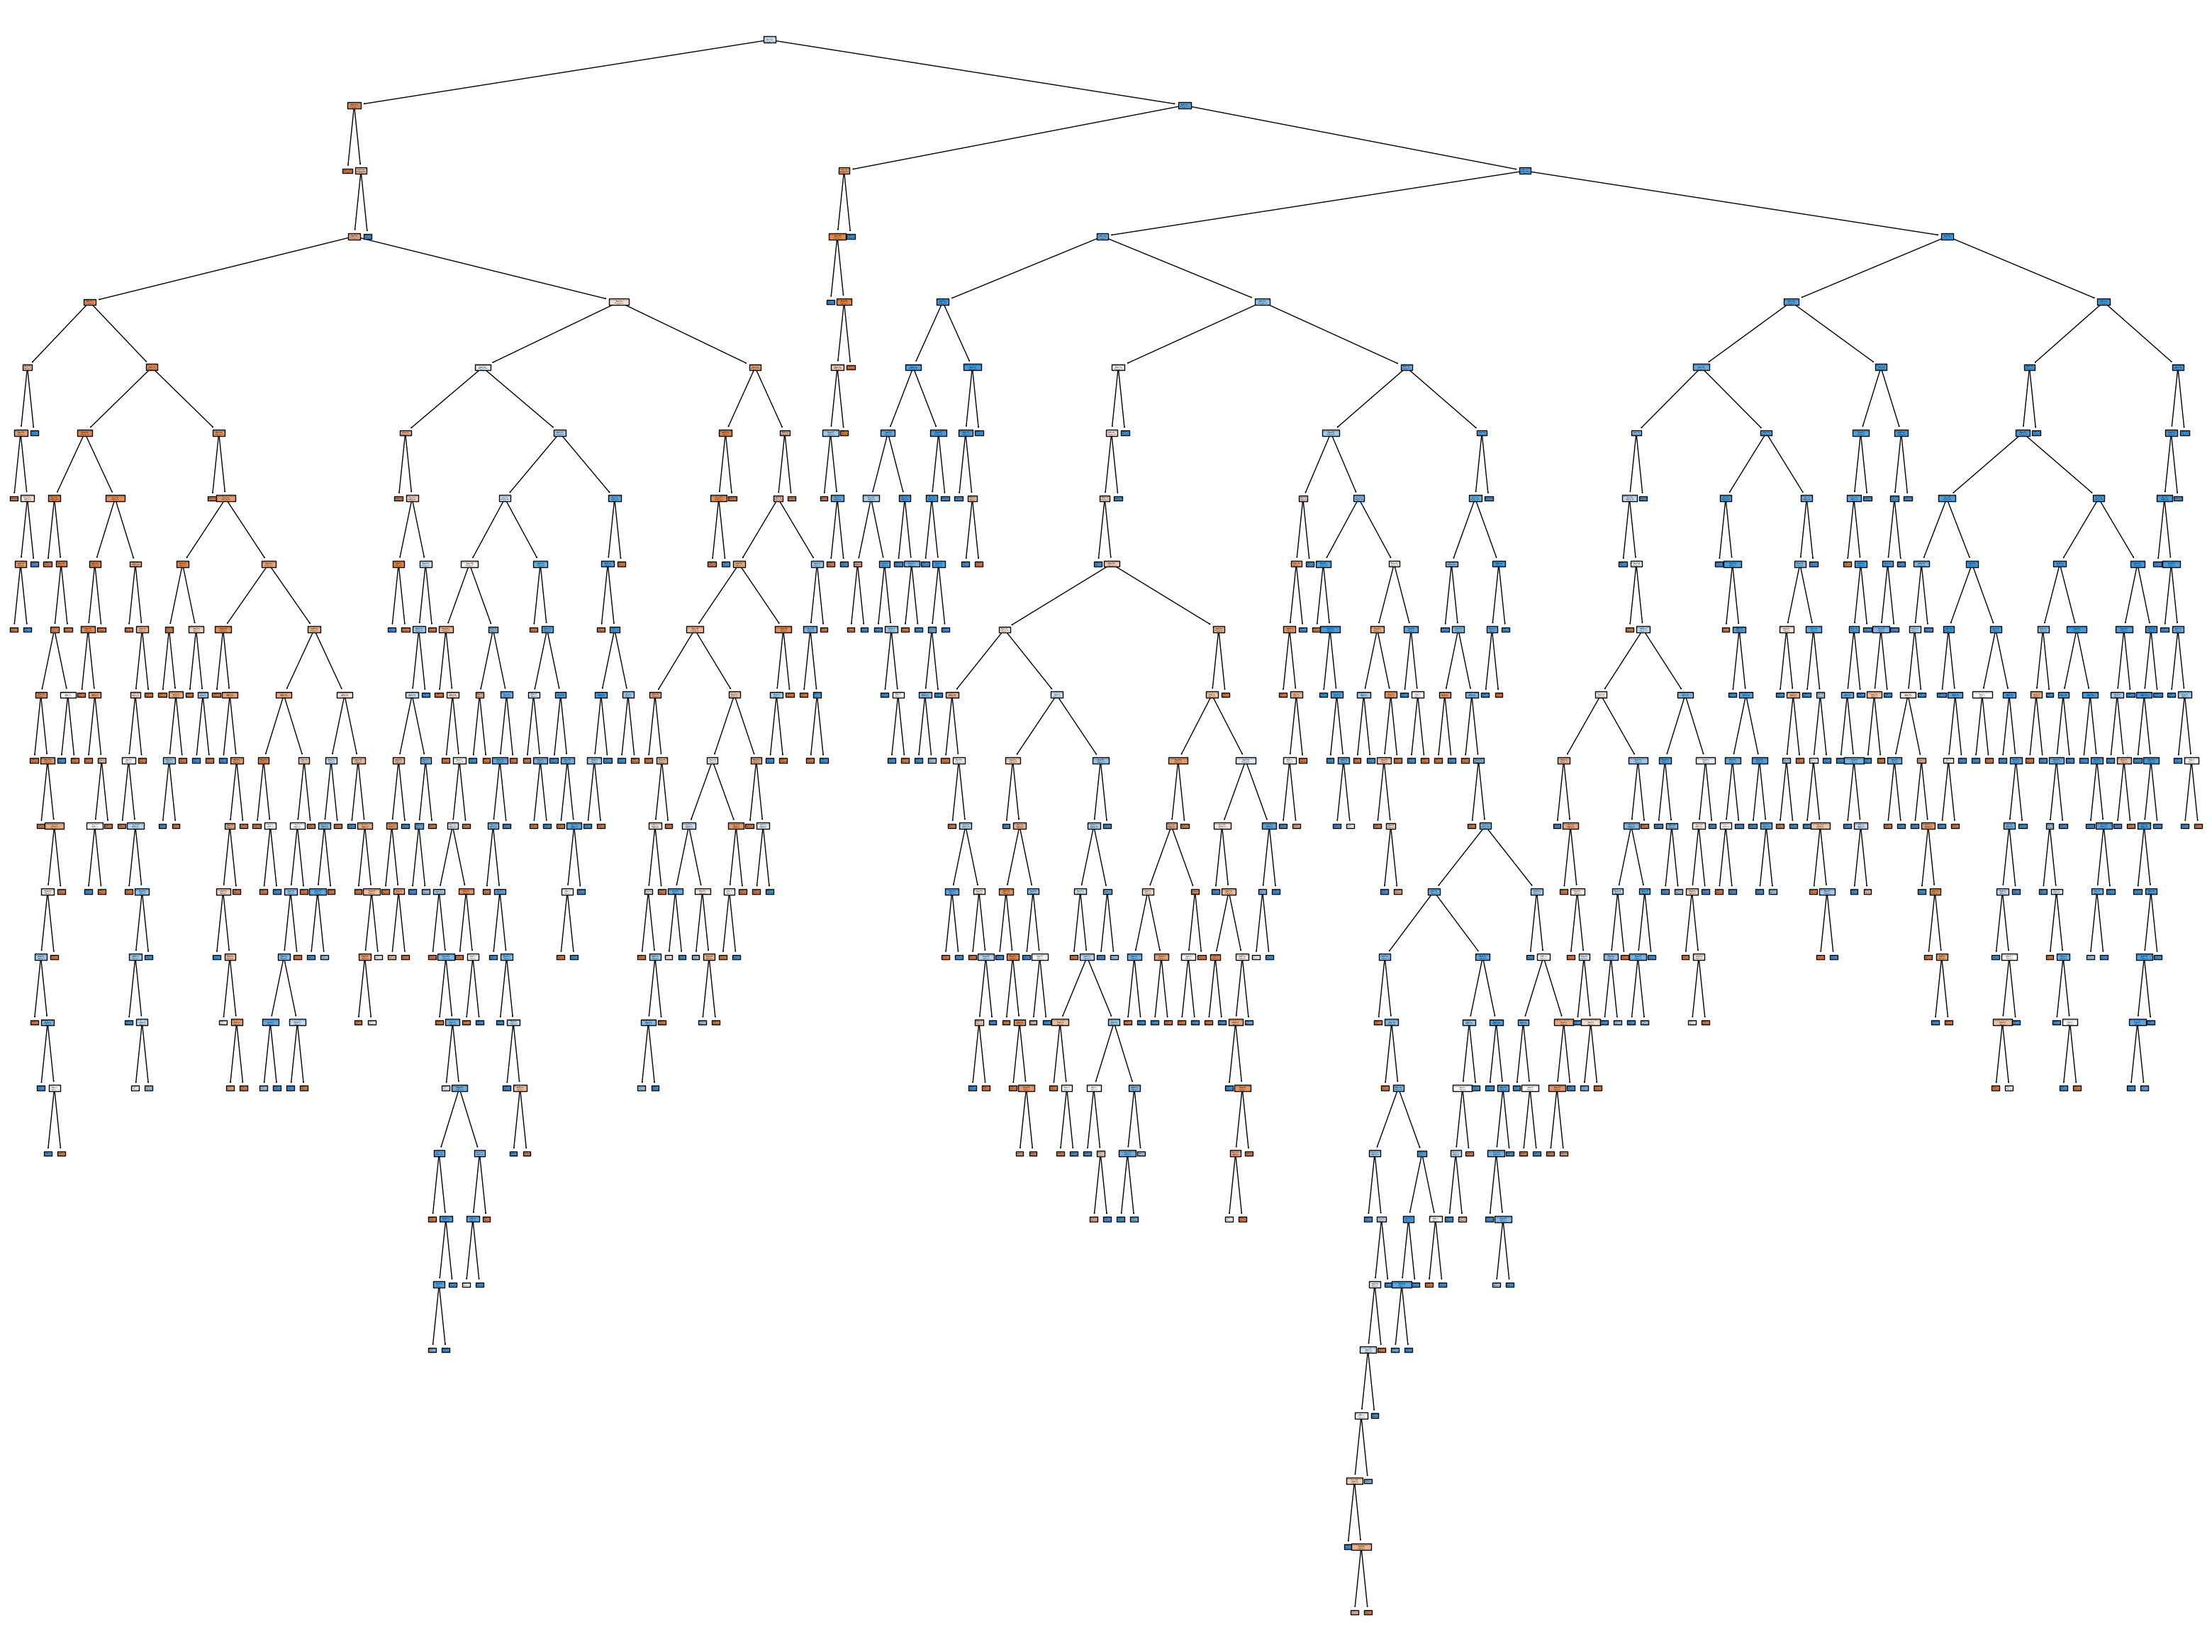

Accuracy score for unpruned decision tree is:
Train data score - 0.9908035579677371
Test data score - 0.9624604251469923


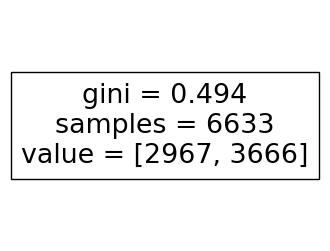

Accuracy after pruning:  0.5633197648123022


In [373]:
#using post pruning on phishing dataset

#Split data into training and test data

X = phishing_data.loc[:, phishing_data. columns != '  Class ']
y = phishing_data['  Class ']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

features = X.columns

#Implementing an unpruned decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(decision_tree,feature_names=features,class_names=['0', '1','-1'], filled=True)
plot.show()

train_prediction = decision_tree.predict(x_train)
unpruned_prediction = decision_tree.predict(x_test)
print("Accuracy score for unpruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, unpruned_prediction))

tree = DecisionTreeClassifier(random_state=1, ccp_alpha=0.01)  # using CCP
tree.fit(X_train, y_train)

# Plot the pruned tree
plot.figure(figsize=(4, 3))
plot_tree(tree)
plot.show()

# Evaluate the performance of the pruned tree on the test data
y_pred = tree.predict(X_test)
print("Accuracy after pruning: ", accuracy_score(y_test, y_pred))


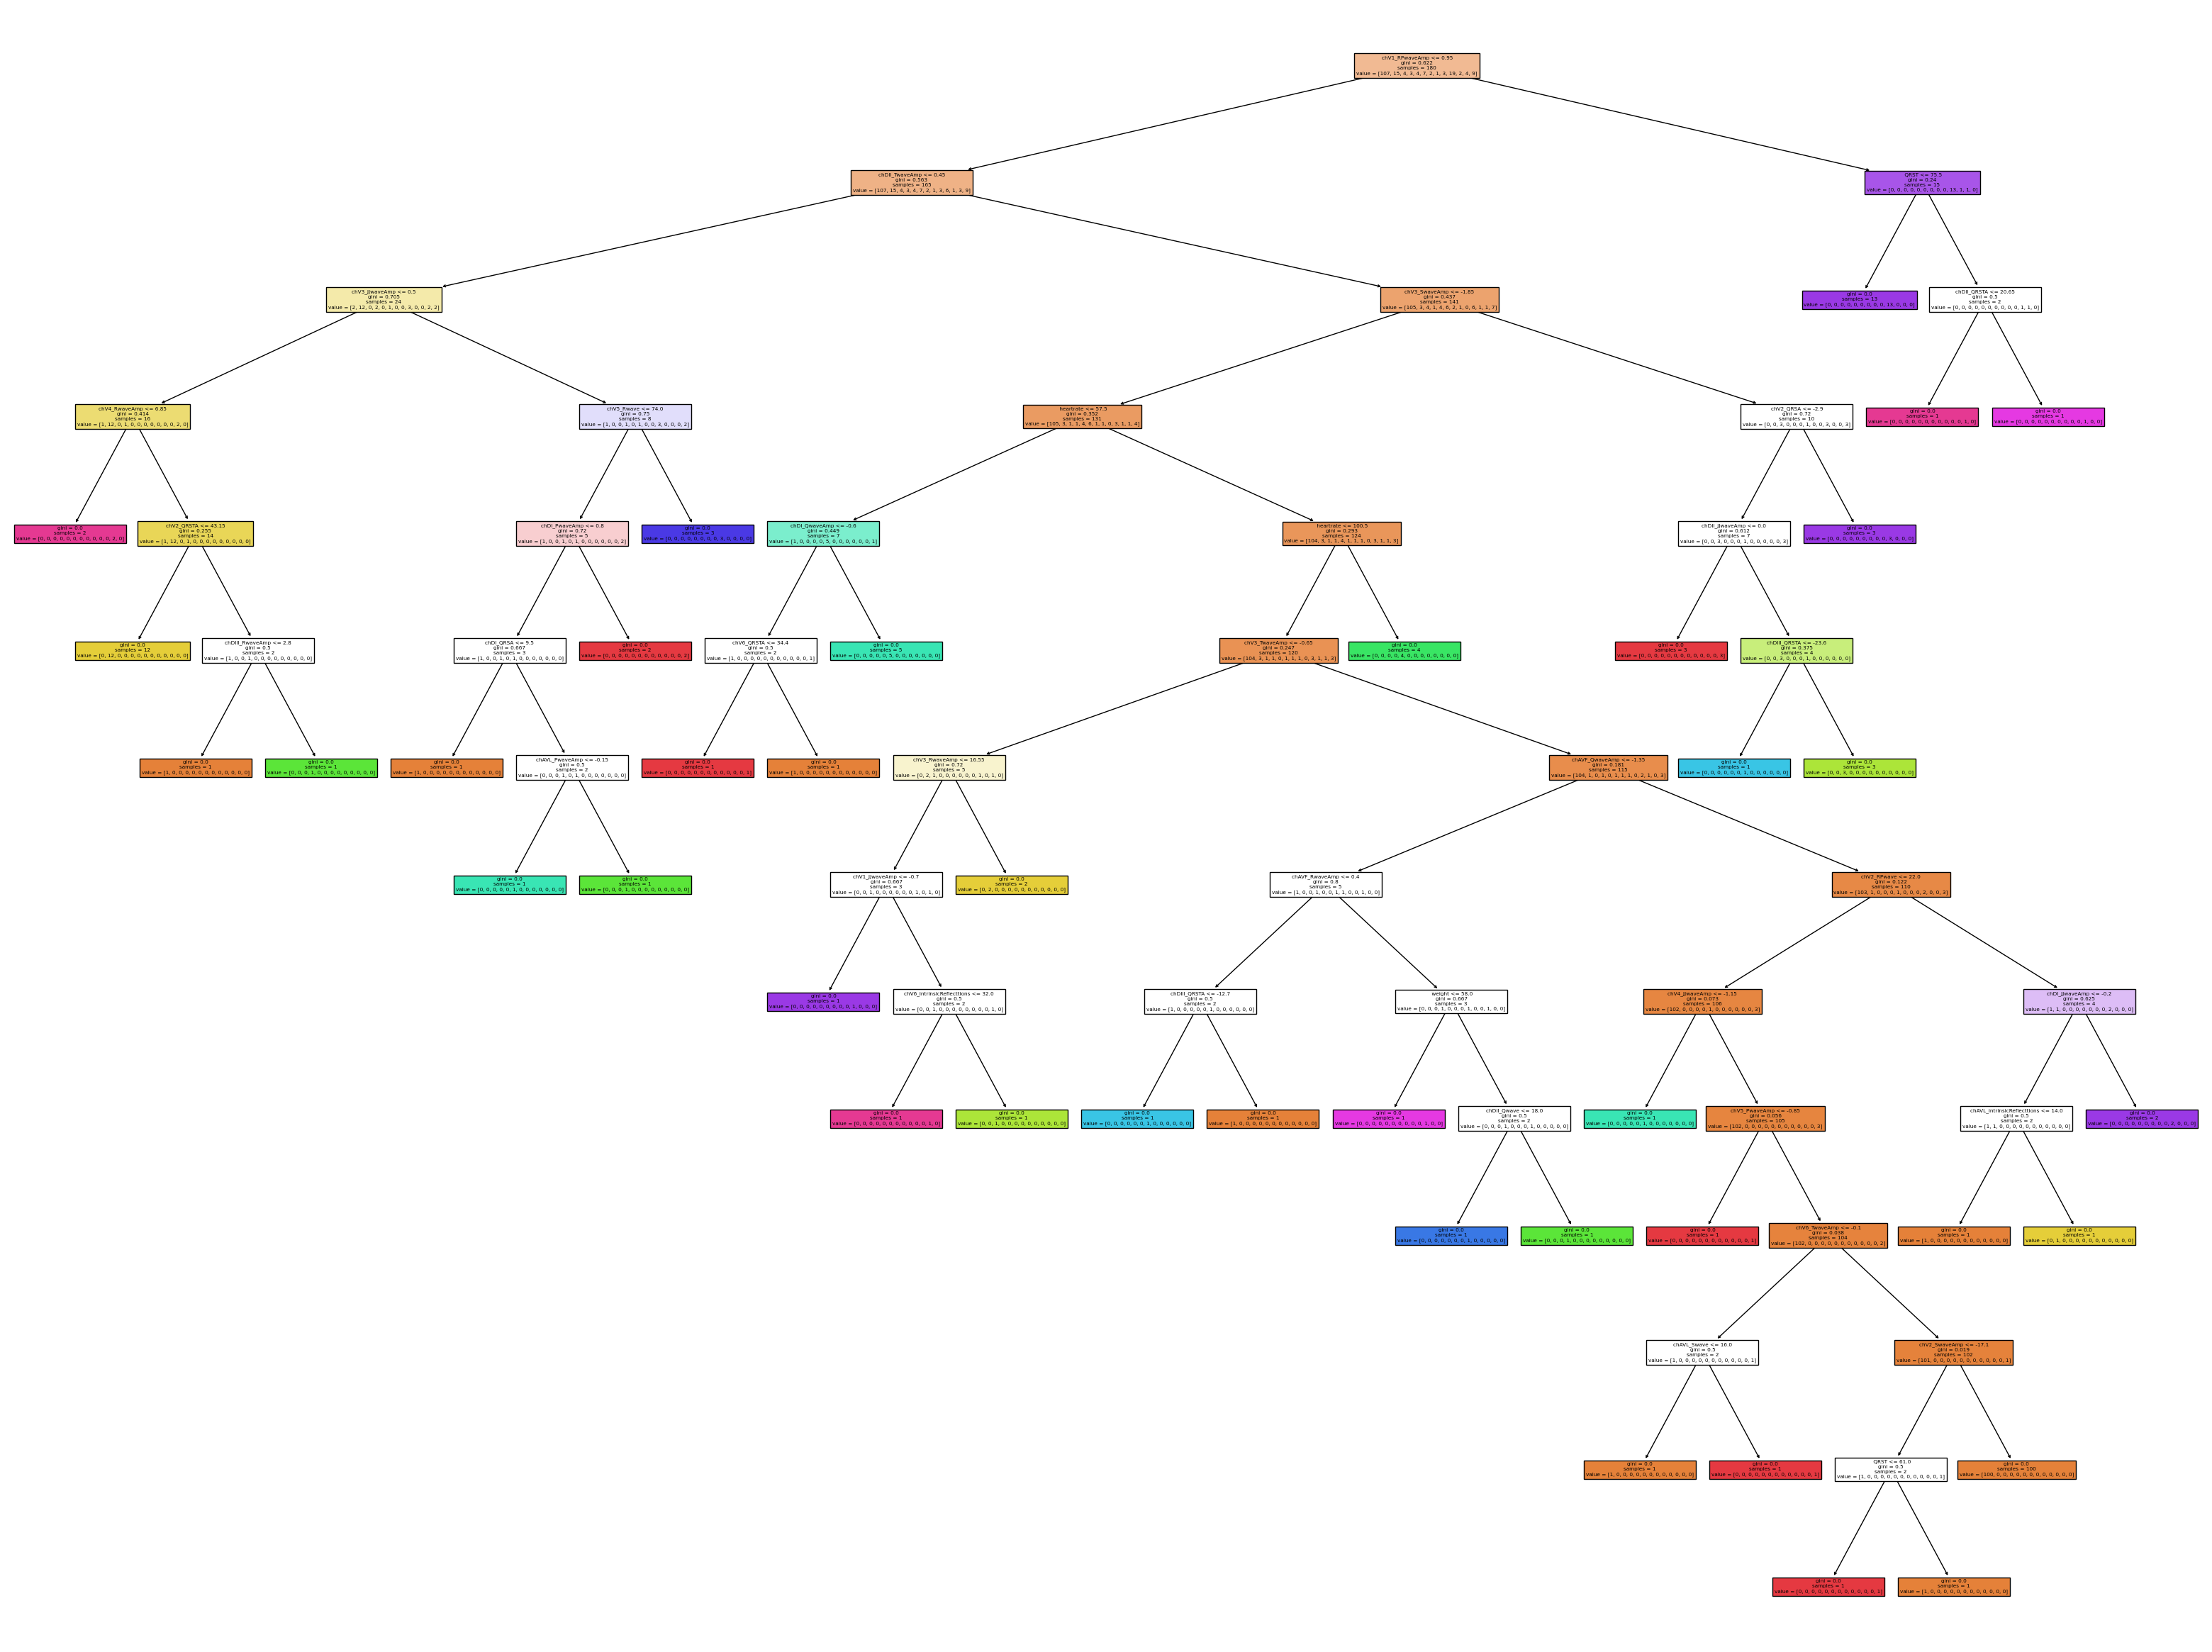

Accuracy score for unpruned decision tree is:
Train data score - 1.0
Test data score - 0.6470588235294118


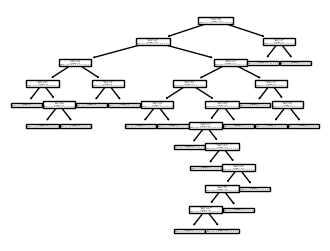

Accuracy after pruning:  0.6176470588235294


In [395]:
#using post pruning on arrhythmia dataset

#Split data into training and test data

X = arrhythmia_data.loc[:, arrhythmia_data. columns != 'class']
y = arrhythmia_data['class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=4)

features = X.columns

#Implementing an unpruned decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(decision_tree,feature_names=features, filled=True)
plot.show()

train_prediction = decision_tree.predict(x_train)
unpruned_prediction = decision_tree.predict(x_test)
print("Accuracy score for unpruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, unpruned_prediction))

tree = DecisionTreeClassifier(random_state=1, ccp_alpha=0.01)  # Using CCP
tree.fit(x_train, y_train)

# Plot the pruned tree
plot.figure(figsize=(4, 3))
plot_tree(tree)
plot.show()

# Evaluate the performance of the pruned tree on the test data
y_pred = tree.predict(x_test)
print("Accuracy after pruning: ", accuracy_score(y_test, y_pred))


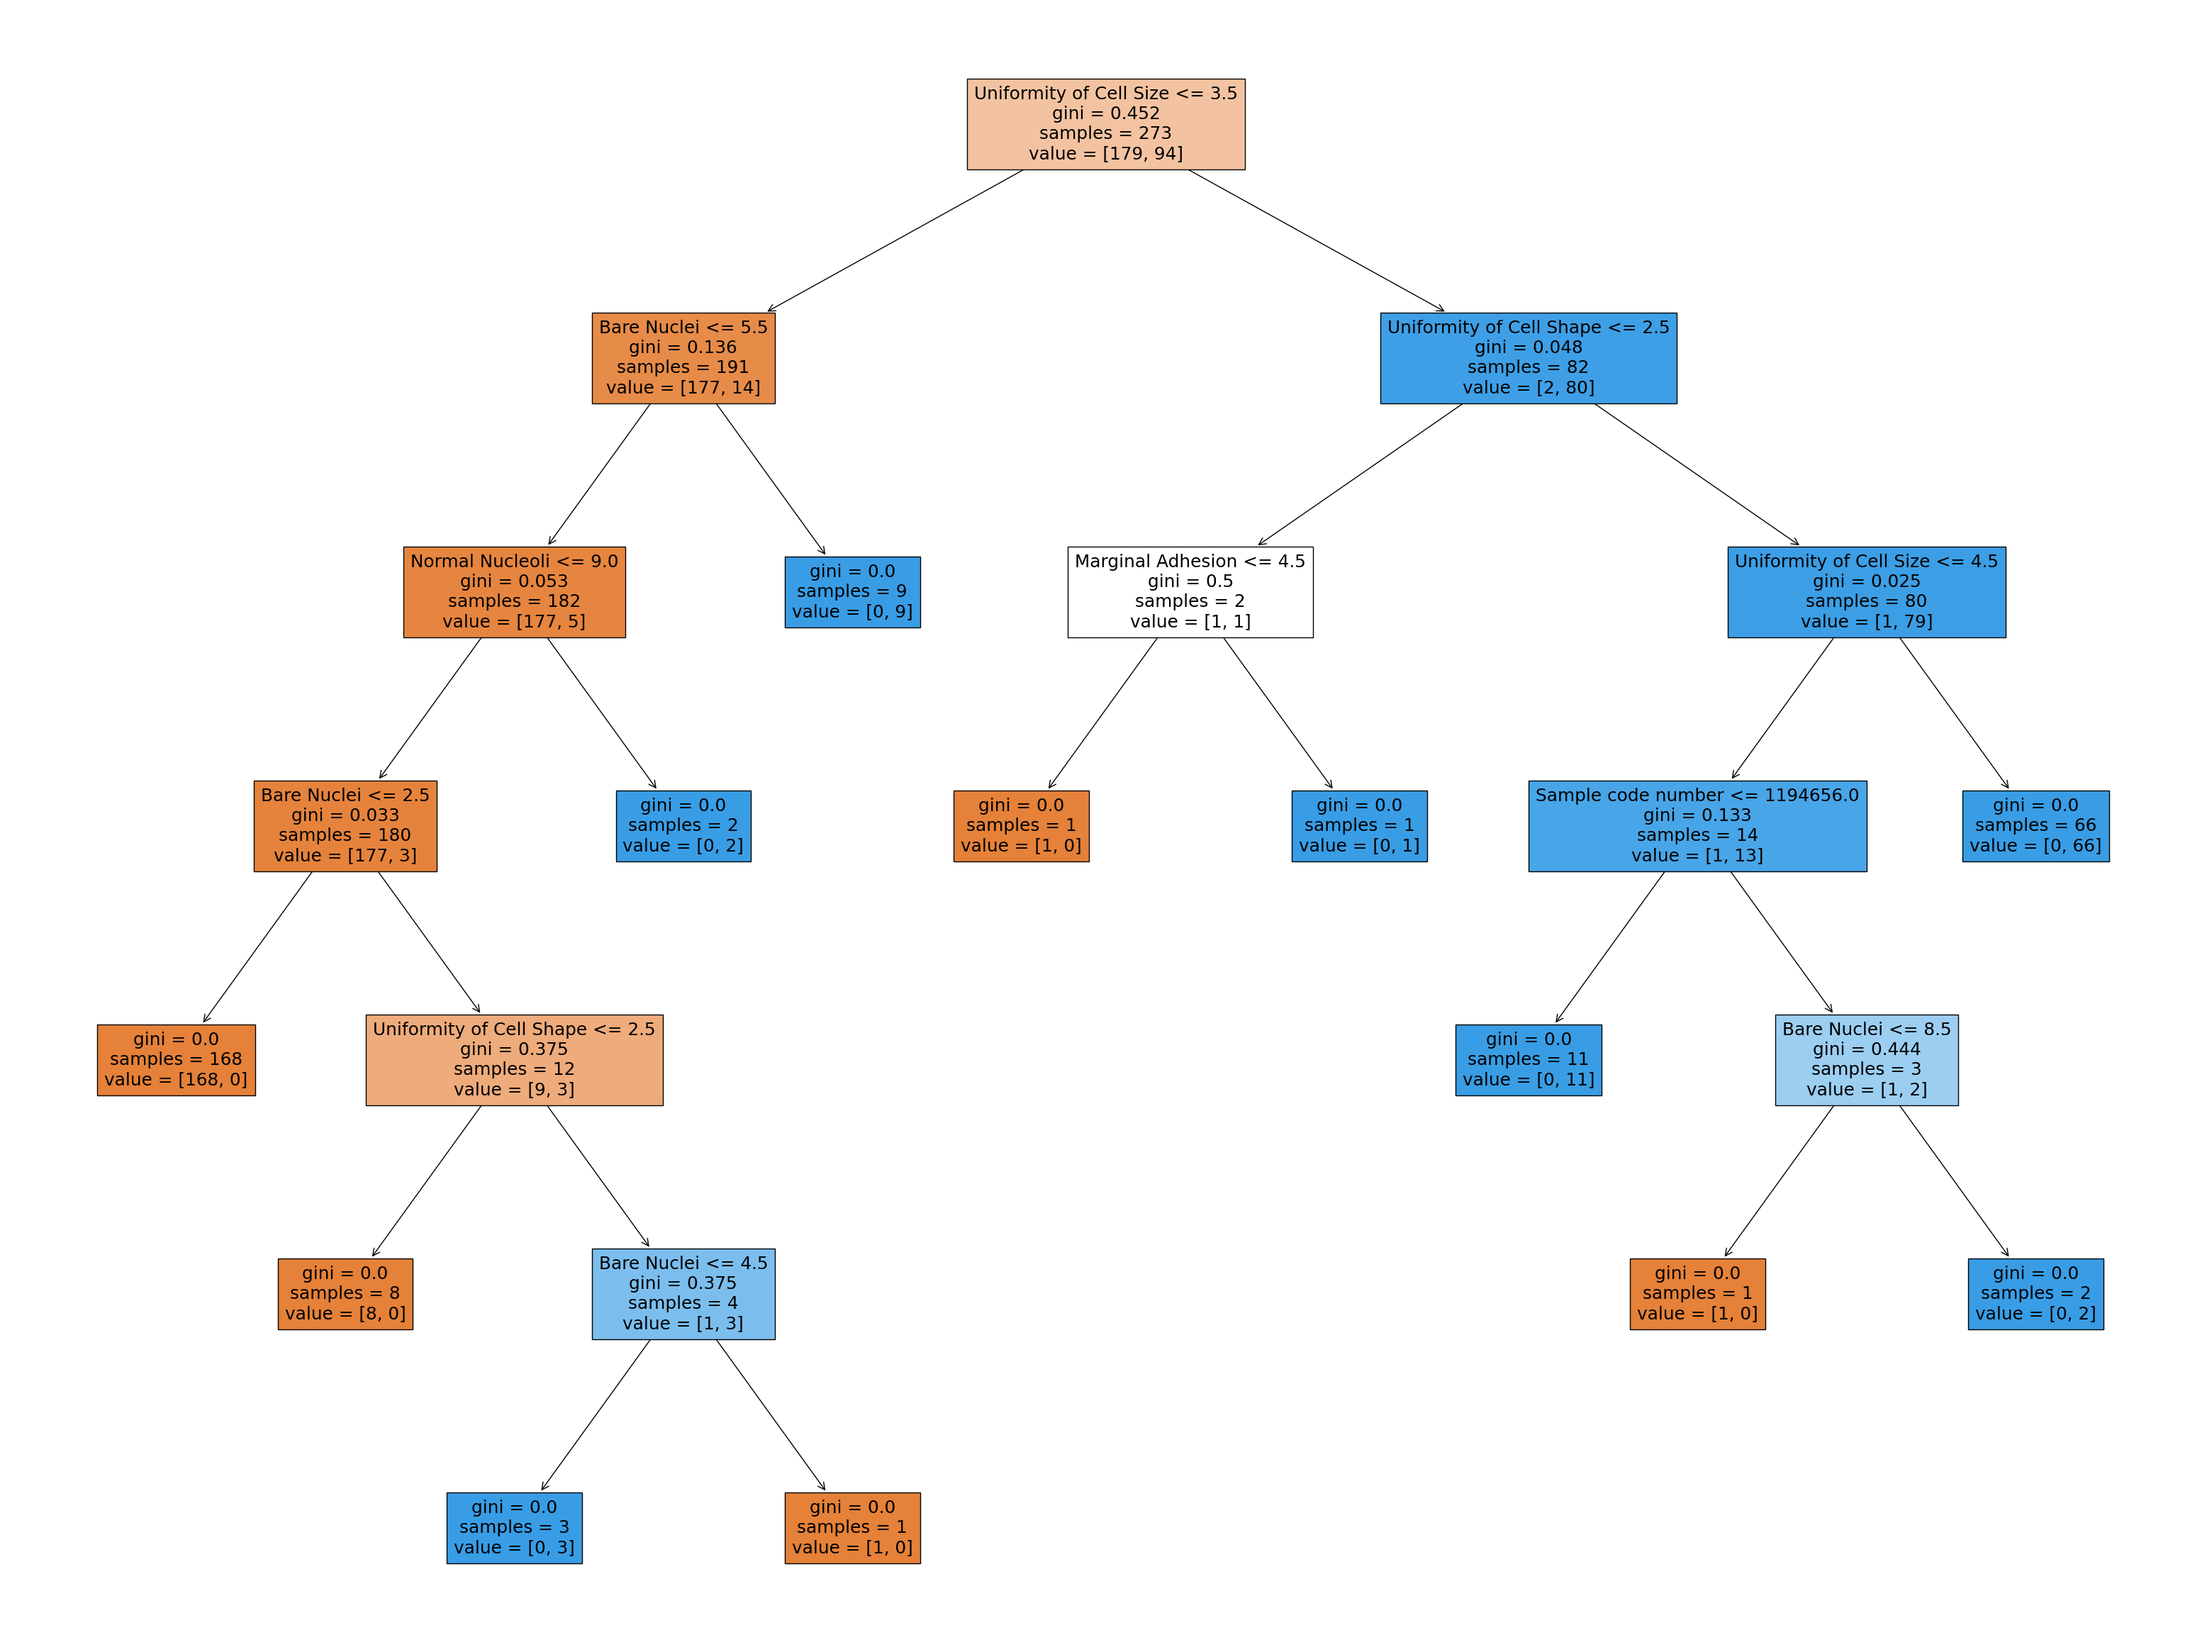

Accuracy score for unpruned decision tree is:
Train data score - 1.0
Test data score - 0.9560975609756097


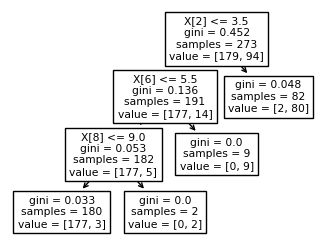

Accuracy after pruning:  0.9536585365853658


In [396]:
# using post pruning on dataset on BCP data

# Split data into training and test data

X = bcp_data.loc[:, bcp_data. columns != 'Class']
y = bcp_data['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=4)

features = X.columns

#Implementing an unpruned decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
plot.figure(figsize=(40, 30))
plot_tree(decision_tree,feature_names=features, filled=True)
plot.show()

train_prediction = decision_tree.predict(x_train)
unpruned_prediction = decision_tree.predict(x_test)
print("Accuracy score for unpruned decision tree is:")
print("Train data score -",accuracy_score(y_train,train_prediction))
print("Test data score -",accuracy_score(y_test, unpruned_prediction))

tree = DecisionTreeClassifier(random_state=1, ccp_alpha=0.01)  # Using CCP
tree.fit(x_train, y_train)

# Plot the pruned tree
plot.figure(figsize=(4, 3))
plot_tree(tree)
plot.show()

# Evaluate the performance of the pruned tree on the test data
y_pred = tree.predict(x_test)
print("Accuracy after pruning: ", accuracy_score(y_test, y_pred))


In [393]:
Q5 Comparing pre-pruning and post-pruning techniques

Pre-pruning reduces a decision tree before the tree is fully built, by setting criteria in the DecisionTreeClassifier itself.
Post-pruning removes branches from the tree after the tree is fully constructed.

The main advantage of pre pruning is that it limits the growth of the tree while the tree is yet to be completely built. Thus 
it is computationally efficient than post-pruning. Since the whole tree is considered in pre-pruning it does not help 
much in overfitting issue.

Post-pruning has the main advantage of working on a complete tree and removing its branches. But it is computationally 
expensive as it requires a fully grown tree.